<a href="https://colab.research.google.com/github/v1git12/Capstone-Project-3-Android-Authenticity-Prediction-/blob/main/Android_Authenticity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Android Authenticity Prediction




##### **Project Type**    - Classification/ Supervised Machine Learning
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Marathe
##### **Team Member 2 -** Riya Patel

# **Project Summary -**

Android Authenticity Prediction is a machine learning problem that aims to predict whether an Android application (app) is authentic or not. In recent years, there has been a significant increase in the number of mobile apps, and as a result, the risk of downloading malicious apps has also increased. Therefore, it is essential to develop a model that can accurately predict the authenticity of Android apps.

The classification of Android authenticity prediction involves the use of supervised learning algorithms such as logistic regression, decision trees, support vector machines, and neural networks. The features used in this classification task include permissions, APIs, and the app's manifest file.

The process of classifying Android apps involves first collecting data about the apps, including their permissions, APIs, and manifest file. The data is then preprocessed to remove any irrelevant or redundant features. The preprocessed data is then used to train a classification model, which is evaluated using metrics such as accuracy, precision, recall, and F1-score.

The results of the classification model can be used to help users make informed decisions about which apps to download and install on their devices. Additionally, this model can help app stores identify and remove malicious apps from their platforms, enhancing the overall security of the mobile ecosystem.






# **GitHub Link -**


1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp

# **Problem Statement**


**The problem of Android Authenticity Prediction is to develop a machine learning model that can accurately predict whether an Android application (app) is authentic or not. With the increase in the number of mobile apps, the risk of downloading malicious apps has also increased. Malicious apps can steal sensitive user data, perform unwanted actions, and damage the user's device. Therefore, it is essential to develop a model that can accurately predict the authenticity of Android apps and help users make informed decisions about which apps to download and install on their devices. The challenge is to identify the relevant features that can distinguish between authentic and malicious apps and to train a classification model that can generalize well to new, unseen apps. Additionally, the model should be able to handle the large and dynamic nature of the mobile app ecosystem, where new apps are constantly being developed and released.**





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Evaluation Metrices and Cross Validation Techniques
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_auc_score, classification_report
from sklearn.metrics import cohen_kappa_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Parametric Algorithms
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Ensemble Techniques
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

# Non-Parametric Algorithms
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC, LinearSVC


import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset

url = 'https://drive.google.com/file/d/1DQgeRkBy0LDwyf8k-VBBN02kc8_K9oi9/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(29999, 184)

### Dataset Information

In [5]:
# Dataset Info of first 10 columns
df.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App                          29998 non-null  object 
 1   Package                      29999 non-null  object 
 2   Category                     29999 non-null  object 
 3   Description                  29996 non-null  object 
 4   Rating                       29999 non-null  float64
 5   Number of ratings            29999 non-null  int64  
 6   Price                        29999 non-null  float64
 7   Related apps                 29244 non-null  object 
 8   Dangerous permissions count  29795 non-null  float64
 9   Safe permissions count       29999 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 2.3+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

2689

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.iloc[:, :10].isnull().sum()

App                              1
Package                          0
Category                         0
Description                      3
Rating                           0
Number of ratings                0
Price                            0
Related apps                   755
Dangerous permissions count    204
Safe permissions count           0
dtype: int64

<AxesSubplot:>

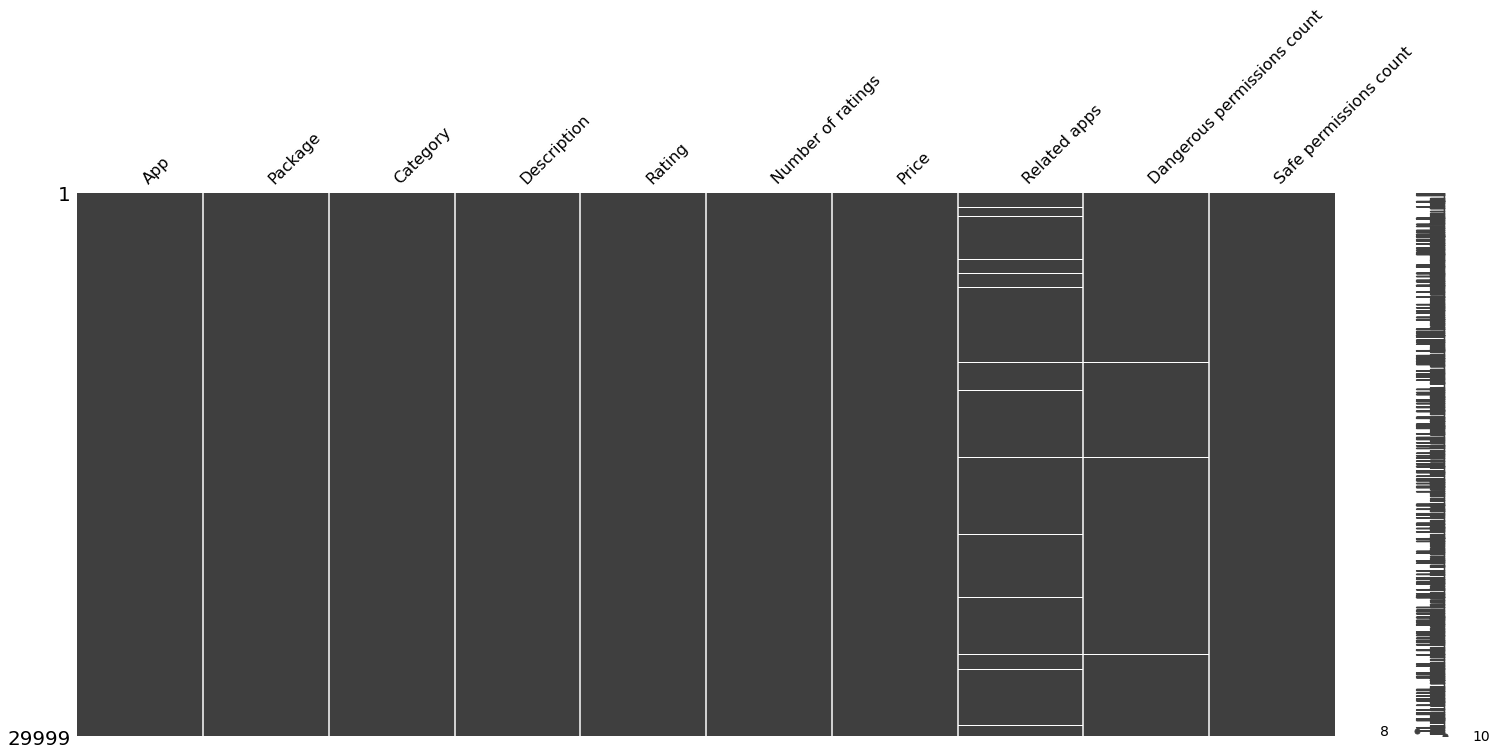

In [8]:
import missingno as msno
# visualize the null values in the first 10 columns of the DataFrame
msno.matrix(df.iloc[:, :10])


### What did you know about your dataset?

This file contains more than 30,000 Android apps. Basically, in our data orignally there are 29999 rows and 184 columns
with 2686 duplicate values and overall 963 null or missing values. Related Apps and Dangerous Permission Count has maximum number of missing value so we will further work on it.

## ***2. Understanding Your Variables***

In [9]:
# Dataset First 50 Columns
df.columns[1:51]

Index(['Package', 'Category', 'Description', 'Rating', 'Number of ratings',
       'Price', 'Related apps', 'Dangerous permissions count',
       'Safe permissions count', 'Default : Access DRM content. (S)',
       'Default : Access Email provider data (S)',
       'Default : Access all system downloads (S)',
       'Default : Access download manager. (S)',
       'Default : Advanced download manager functions. (S)',
       'Default : Audio File Access (S)', 'Default : Install DRM content. (S)',
       'Default : Modify Google service configuration (S)',
       'Default : Modify Google settings (S)',
       'Default : Move application resources (S)',
       'Default : Read Google settings (S)',
       'Default : Send download notifications. (S)',
       'Default : Voice Search Shortcuts (S)',
       'Default : access SurfaceFlinger (S)',
       'Default : access checkin properties (S)',
       'Default : access the cache filesystem (S)',
       'Default : access to passwords for Googl

In [10]:
# Dataset next 50 Columns
df.columns[50:101]

Index(['Default : modify secure system settings (S)',
       'Default : modify the Google services map (S)',
       'Default : modify/delete USB storage contents modify/delete SD card contents (S)',
       'Default : monitor and control all application launching (S)',
       'Default : partial shutdown (S)',
       'Default : permanently disable device (S)',
       'Default : permission to install a location provider (S)',
       'Default : power device on or off (S)',
       'Default : press keys and control buttons (S)',
       'Default : prevent app switches (S)', 'Default : read frame buffer (S)',
       'Default : read instant messages (S)',
       'Default : read phone state and identity (S)',
       'Default : record what you type and actions you take (S)',
       'Default : reset system to factory defaults (S)',
       'Default : run in factory test mode (S)', 'Default : set time (S)',
       'Default : set wallpaper size hints (S)',
       'Default : start IM service (S)',
   

In [11]:
# Dataset next 50 Columns
df.columns[101:]

Index(['System tools : change background data usage setting (S)',
       'System tools : change network connectivity (D)',
       'System tools : change your UI settings (D)',
       'System tools : delete all application cache data (D)',
       'System tools : disable keylock (D)',
       'System tools : display system-level alerts (D)',
       'System tools : expand/collapse status bar (S)',
       'System tools : force stop other applications (S)',
       'System tools : format external storage (D)',
       'System tools : kill background processes (S)',
       'System tools : make application always run (D)',
       'System tools : measure application storage space (S)',
       'System tools : modify global animation speed (D)',
       'System tools : modify global system settings (D)',
       'System tools : mount and unmount filesystems (D)',
       'System tools : prevent device from sleeping (D)',
       'System tools : read subscribed feeds (S)',
       'System tools : read sy

In [12]:
# Dataset Describe of First 10 Rows
df.iloc[:, :10].describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000
mean,3.537215,6.852608e+03,0.625707,3.111160,1.353978
std,1.424685,4.586899e+04,3.222620,3.052602,1.523491
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.300000,4.000000e+00,0.000000,1.000000,0.000000
50%,4.000000,4.600000e+01,0.000000,2.000000,1.000000
75%,4.400000,7.160000e+02,0.000000,4.000000,2.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000


In [13]:
# Median Value of Independent Column (Dangerous permissions count)
df['Dangerous permissions count'].median()

2.0

In [14]:
# Median Value of Independent Column (Safe permissions count) 
df['Safe permissions count'].median()

1.0

We can say that :
* Dangerous Permissions Count is ranging from 0 to 30 with median value 2
* Safe Permissions Count is ranging from 0 to 16 with median value 1
* 75% of the values in Dangerous Permission count column are 4.0 or less.
* 75% of the values in Safe Permission count column are 2.0 or less.



### Variables Description 

1. App:- Name of the App

2. Package:-OBB/Data package installed in root folder

3. Category:- App Category (eg. Entertainment, Adventure, puzzle, Action, Antivirus, etc.)

4. Description:- App Description

5. Rating:- Rating out of 5

6. Number of ratings:- No. of Ratings given by users

7. Price:- Price of the App

8. Related apps:- Apps related to installed App

9. Dangerous (D) permissions count:- No. of Dangerous Permissions allowed by user

10. Safe (S) permissions count-No. of Safe Permissions allowed by user 

11. Default: Access DRM content. (S):-0: No. 1: Yes

12. Default: Access Email provider data (S)- O: No, 1: Yes

13. Default: Access all system downloads (S):-0: No. 1: Yes

14. Default: Access download manager. (S):-O: No. 1: Yes

15. Default: Advanced download manager functions. (S)-0: No. 1: Yes 

16. Default: Audio File Access (S)-0 No. 1: Yes

17. Default: Install DRM content. (S)-0: No. 1: Yes

18. Default: Modify Google service configuration (S)- O: No, 1: Yes 

19. Default: Modify Google settings (S)-0: No, 1: Yes

20. Default: Move application resources (S)-0: No. 1: Yes

21. Default: Read Google settings (S)-0: No, 1: Yes

22. Default: Send download notifications. (S)-0: No, 1: Yes

23. Default: Voice Search Shortcuts (S)-0: No, 1: Yes

24. Default access SurfaceFinger (S)-0: No.1: Yes

25. Default: access checkin properties (S): 0:No, 1: 

26. Default: access the cache filesystem (S)-0: No. 1: Yes

27. Default: access to passwords for Google accounts (S):-0: No, 1: Yes

28. Default: act as an account authenticator (S):-0: No, 1: Yes

29. Default: bind to a wallpaper (S)-0: No. 1: Yes

30. Default: bind to an input method (S):-0: No.1: Yes

31. Default: change screen orientation (S)-0: No., 1: Yes

32. Default: coarse (network-based) location (S)-0: No, 1: Yes

33. Default: control location update notifications (S)-0: No, 1: Yes

34. Default: control system backup and restore (S)-0: No. 1: Yes 

35. Default: delete applications (S):-0: No, 1: Yes

36. Default: delete other applications' caches (S)-0: No, 1: Yes 

37. Default: delete other applications' data (S):-0: No, 1: Yes

38. Default: directly call any phone numbers (S):-0: No. 1: Yes

39. Default: directly install applications (S)-0: No. 1: Yes

40. Default: disable or modify status bar (S)-O: No. 1: Yes

41. Default: discover known accounts (S)-O: No. 1: Yes 

42. Default: display unauthorized windows (S): -0: No. 1: Yes

43. Default: enable or disable application components (S)-0: No, 1: Yes

44. Default: force application to close (S)-0:No. 1: Yes

45. Default force device reboot (S)-0: No. 1: Yes

46. Default: full Internet access (S)-0: No. 1: Yes

47. Default: interact with a device admin (S)-0: No. 1: Yes

48. Default: manage application tokens (S)-0: No. 1: Yes

49. Default: mock location sources for testing (S)-0: No. 1: Yes

50. Default: modify battery statistics (S)-0: No. 1: Yes

51. Default: modify secure system settings (S)-0: No. 1: Yes

52. Default: modify the Google services map (S)-0: No, 1:Yes

53. Default: modify/delete USB storage contents modify/delete SD card contents (S)-0:

54. Default: monitor and control all application launching (S)-0: No. 1: Yes

55. Default: partial shutdown (S)-O: No. 1: Yes

56. Default: permanently disable device (S)-0: No.1: Yes

57. Default: permission to install a location provider (S)-0: No. 1: Yes

58. Default: power device on or off (S)-0: No, 1: Yes

59. Default: press keys and control buttons (S):-0: No, 1: Yes

60. Default: prevent app switches (S)-0: No. 1: Yes

61. Default: read frame buffer (S)-0: No.1: Yes

62. Default: read instant messages (S)-0: No. 1: Yes

63. Default read phone state and identity (S)-0: No. 1: Yes

64. Default: record what you type and actions you take (S): O: No. 1: Yes

65. Default: reset system to factory defaults ($):-O: No. 1: Yes

66. Default: run in factory test mode (S)-0: No. 1: Yes

67. Default: set time ($):-0: No. 1: Yes

68. Default: set wallpaper size hints (S)-0: No. 1: Yes

69. Default: start IM service (S)-0: No. 1: Yes

70. Default: update component usage statistics (S)-0: No. 1: Yes

71. Default: write contact data (S)-0: No. 1: Yes

72. Default: write instant messages (S)-0 No. 1: Yes

73. Development tools: enable application debugging (D):-0: No. 1: Yes

74. Development tools: limit number of running processes (D) O:No. 1: Yes

75. Development tools: make all background applications close (D):- O: No. 1: Yes 

76. Development tools: send Linux signals to applications (D)- O: No, 1: Yes

77. Hardware controls: change your audio settings (D):-0: No.1: Yes 

78. Hardware controls: control flashlight (S)-O:No.1: Yes

79. Hardware controls: control vibrator (S)-O: No.1: Yes

80. Hardware controls: record audio (0)-0: No. 1: Yes

81. Hardware controls: take pictures and videos (D):-O: No. 1: Yes

82. Hardware controls: test hardware (S)-O: No, 1: Yes

83. Network communication: Broadcast data messages to applications. (S):- O: No. 1: Yes

84. Network communication: control Near Field Communication (D):-0: No. 1: Yes

85. Network communication: create Bluetooth connections (D):-0: No. 1: Yes 

86. Network communication: download files without notification (S)-0: No, 1: Yes

87. Network communication: full Internet access (D):-0: No, 1: Yes 

88. Network communication: make/receive Internet calls (D)-0: No, 1: Yes

89. Network communication: receive data from Internet (S)-0: No. 1: Yes

90. Network communication: view Wi-Fi state (S)-0: No. 1: Yes

91. Network communication: view network state (S):-0: No. 1: Yes

92. Phone calls: intercept outgoing calls (D):-0: No. 1: Yes

93. Phone calls: modity phone state (S)-O: No. 1: Yes

94. Phone calls: read phone state and identity (D)-O: No, 1: Yes

95. Services that cost you money: directly call phone numbers (D):- 0 No. 1: Yes

96. Services that cost you money: send SMS messages (D):-0: No. 1: Yes

97. Storage: modify/delete USB storage contents modify/delete SD card contents (D)-0: No. 1: Yes

98. System tools: allow Wi-Fi Multicast reception (D):-0: No. 1: Yes 

99. System tools: automatically start at boot (S)-0: No, 1: Yes

100. System tools: bluetooth administration (D):- O: No. 1: Yes

101. System tools: change Wi-Fi state (D)-O: No, 1: Yes

102. Systern tools: change background data usage setting (S)-0: No, 1: Yes

103. Systern tools: change network connectivity (D)-0 No. 1: Yes

104. System tools: change your Ul settings (D)-0: No, 1: Yes

105. System tools: delete all application cache data (D)-0: No. 1: Yes

106. System tools: disable keylock (D)-0: No. 1: Yes

107. Systern tools: display system-level alerts (D): 0:No. 1: Yes 

108. Systern tools: expand/collapse status bar (5)-0: No. 1: Yes

109. System tools: force stop other applications (S)-0: No. 1: Yes

110. System tools: format external storage (D):-0: No, 1: Yes

111. System tools: kill background processes (S)-0: No. 1: Yes

112. System tools: make application always run (D)-0: No. 1: Yes

113. System tools: measure application storage space (S)-0: No. 1: Yes

114. System tools: modify global animation speed (D):-0: No. 1: Yes

115. System tools: modify global system settings (D):-0: No. 1: Yes

116. System tools: mount and unmount filesystems (D):-0: No. 1: Yes

117. System tools: prevent device from sleeping (D):-0: No. 1: Yes

118. System tools: read subscribed feeds (S)-O: No, 1: Yes

119. System tools: read sync settings (S)-0: No, 1: Yes

120. System tools: read sync statistics (S)-0: No. 1: Yes

121. System tools: read/write to resources owned by diag (S)-0: No. 1: Yes

122. System tools reorder running applications (D)-0: No. 1: Yes 

123. System tools: retrieve running applications (D)-0: No, 1: Yes

124. System tools: send package removed broadcast (S)-0: No. 1: Yes 

125. Systern tools: send sticky broadcast (S)-0: No, 1: Yes

126. System tools: set preferred applications (S)-0: No, 1: Yes 

127. System tools: set time zone (D)-0: No. 1: Yes

128. System tools: set wallpaper (S):- O: No. 1: Yes

129. Systern tools: set wallpaper size hints (S):-O: No. 1: Yes 

130. System tools: write Access Point Name settings (D):- O: No. 1: Yes

131. System tools: write subscribed feeds (D):- O: No. 1: Yes

132. System tools: write sync settings (D):- O: No. 1: Yes

133. Your accounts: Blogger (D):-0: No.1: Yes

134. Your accounts: Google App Engine (D):-0: No, 1: Yes

135. Your accounts: Google Docs (D)-0: No, 1: Yes

136. Your accounts: Google Finance (D):-0: No. 1: Yes 

137. Your accounts: Google Maps (D)-0: No. 1: Yes

138. Your accounts: Google Spreadsheets (D):-0: No, 1: Yes

139. Your accounts: Google Voice (D):-0: No, 1: Yes

140. Your accounts: Google mail (D)-0: No. 1: Yes

141. Your accounts: Picasa Web Albums (D):-0: No, 1: Yes

142. Your accounts: YouTube (D)-0: No.1: Yes

143. Your accounts: YouTube usernames (D)-0. No.1: Yes

144. Your accounts: access all Google services (S): O: No, 1: Yes

145. Your accounts: access other Google services (D):-O No. 1: Yes

146. Your accounts: act as an account authenticator (D):- O: No, 1: Yes

147. Your accounts: act as the AccountManagerService (S)- O: No, 1: Yes

148. Your accounts: contacts data in Google accounts (D):- O: No.1: Yes 

149. Your accounts: discover known accounts (S)-0: No. 1: Yes

150. Your accounts: manage the accounts list (D)-0: No. 1: Yes 

151. Your accounts: read Google service configuration (S)-0: No. 1: Yes

152. Your accounts use the authentication credentials of an account (D)-0: No. 1: Yes

153. Your accounts: view configured accounts (S)-0: No.1: Yes

154. Your location: access extra location provider commands (S)-O: No., 1: Yes

155. Your location: coarse (network-based) location (D)-0: No. 1: Yes 

156. Your location: fine (GPS) location (D):-0: No, 1: Yes

157. Your location: mock location sources for testing (D):-O No.1: Yes

158. Your messages: Read Email attachments (D):-0: No, 1: Yes

159. Your messages: Send Gmail (S)-0: No.1: Yes

160. Your messages: edit SMS or MMS (D):-0: No.1: Yes

161. Your messages: modify Gmail (D):-0: No. 1: Yes

162. Your messages: read Gmail (D)-0: No. 1: Yes

163. Your messages: read Gmail attachment previews (D):-O: No. 1: Yes

164. Your messages: read SMS or MMS (D)-0: No. 1: Yes

165. Your messages: read instant messages (D)-0: No. 1: Yes

166. Your messages: receive MMS (D)-0: No. 1: Yes

167. Your messages: receive SMS (D):-0: No. 1: Yes

168. Your messages: receive WAP (D):-0: No, 1: Yes

169. Your messages: send SMS-received broadcast (S)-O:No. 1: Yes

170. Your messages: send WAP-PUSH-received broadcast (S)-0: No. 1: Yes

171. Your messages: write instant messages (D):- O: No. 1: Yes

172. Your personal information: add or modify calendar events and send email to guests (D):-0: No. 1: Yes

173. Your personal information: choose widgets (S)-0: No. 1: Yes

174. Your personal information: read Browser's history and bookmarks (D)-0: No. 1: Yes 

175. Your personal information: read calendar events (D)-0: No. 1: Yes

176. Your personal information: read contact data (D):-0: No. 1: Yes

177. Your personal information: read sensitive log data (D)-0: No. 1: Yes

178. Your personal information: read user defined dictionary (D)-0: No. 1: Yes

179. Your personal information : retrieve system internal state (S)-0: No, 1: Yes

180. Your personal information: set alarm in alarm clock (5)-0: No.1: Yes

181. Your personal information: write Browser's history and bookmarks (D):-O: No, 1: Yes

182. Your personal information: write contact data (D)-0: No, 1: Yes

183. Your personal information: write to user defined dictionary (S)-0: No, 1: Yes

184. Class-0: Benign, 1: Malware

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for first 10 independent cols 
df.iloc[:, :10].nunique()

App                            22823
Package                        23485
Category                          30
Description                    23552
Rating                            42
Number of ratings               5312
Price                            425
Related apps                   23868
Dangerous permissions count       28
Safe permissions count            16
dtype: int64

In [16]:
# Check Unique Values for 10-20 independent columns
df.iloc[:, 10:21].nunique()

Default : Access DRM content. (S)                     2
Default : Access Email provider data (S)              2
Default : Access all system downloads (S)             1
Default : Access download manager. (S)                2
Default : Advanced download manager functions. (S)    2
Default : Audio File Access (S)                       2
Default : Install DRM content. (S)                    2
Default : Modify Google service configuration (S)     1
Default : Modify Google settings (S)                  2
Default : Move application resources (S)              2
Default : Read Google settings (S)                    2
dtype: int64

In [17]:
# Count the number of unique values in each column
unique_counts = df.nunique()

# Get the columns where the count is equal to 1
unique_ones = unique_counts[unique_counts == 1]
print('Count of True Columns where the unique values are either one or Zero is :',len(unique_ones))

# Select the corresponding columns from the original DataFrame
unique_columns = df.loc[:, unique_ones.index]

# Get the details of the unique columns
unique_columns.info()


Count of True Columns where the unique values are either one or Zero is : 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 22 columns):
 #   Column                                                                           Non-Null Count  Dtype
---  ------                                                                           --------------  -----
 0   Default : Access all system downloads (S)                                        29999 non-null  int64
 1   Default : Modify Google service configuration (S)                                29999 non-null  int64
 2   Default : access to passwords for Google accounts (S)                            29999 non-null  int64
 3   Default : act as an account authenticator (S)                                    29999 non-null  int64
 4   Default : coarse (network-based) location (S)                                    29999 non-null  int64
 5   Default : discover known accounts (S)                

In [18]:
# Select columns containing 0s
df_0 = unique_columns.loc[:, (unique_columns == 0).all()]

# Select columns containing 1s
df_1 = unique_columns.loc[:, (unique_columns == 1).all()]

#Display column count for df_0 and df_1
print("Columns containing 0s: ", df_0.shape[1])
print("Columns containing 1s: ", df_1.shape[1])


Columns containing 0s:  22
Columns containing 1s:  0


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.
# List of Column names
column_names = list(df.columns[10:184])
column_names

['Default : Access DRM content. (S)',
 'Default : Access Email provider data (S)',
 'Default : Access all system downloads (S)',
 'Default : Access download manager. (S)',
 'Default : Advanced download manager functions. (S)',
 'Default : Audio File Access (S)',
 'Default : Install DRM content. (S)',
 'Default : Modify Google service configuration (S)',
 'Default : Modify Google settings (S)',
 'Default : Move application resources (S)',
 'Default : Read Google settings (S)',
 'Default : Send download notifications. (S)',
 'Default : Voice Search Shortcuts (S)',
 'Default : access SurfaceFlinger (S)',
 'Default : access checkin properties (S)',
 'Default : access the cache filesystem (S)',
 'Default : access to passwords for Google accounts (S)',
 'Default : act as an account authenticator (S)',
 'Default : bind to a wallpaper (S)',
 'Default : bind to an input method (S)',
 'Default : change screen orientation (S)',
 'Default : coarse (network-based) location (S)',
 'Default : control

In [20]:
# Unique Category of Columns
p_column_list = ['Default','Development tools','Hardware controls','Network communication','Phone calls','Services that cost you money','Storage','System tools','Your accounts','Your location','Your messages','Your personal information']

In [21]:
len(p_column_list)

12

In [22]:
copydf = df.copy()
for n in p_column_list:
  cols = [col for col in copydf.columns if col.startswith(n)]
  copydf[n + ' count'] = copydf[cols].sum(axis=1)

In [23]:
copydf.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Hardware controls count,Network communication count,Phone calls count,Services that cost you money count,Storage count,System tools count,Your accounts count,Your location count,Your messages count,Your personal information count
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,2,0,1,1,1,0,1,0,2
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,2,1,0,1,0,1,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,2,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,1,0,0,0,0,0,0,0,0


**INSIGHTS FOUND:**

* There are 174 unique permission
* There are 12 main categories of permission Count namely Default, Development tools, Hardware controls, Network communication, Phone calls, Services that cost you money, Storage, System tools, Your accounts, Your location, Your messages & Your personal information

Duplicate Values Treatments

In [24]:
len(df[df.duplicated()])

2689

In [25]:
# Find columns with duplicate values and their counts
duplicated_columns = []
for column in df.columns:
    duplicated = df.duplicated(subset=[column])
    if duplicated.any():
        count = duplicated.sum()
        duplicated_columns.append((column, count))

# Print list of columns with duplicate values and their counts
if len(duplicated_columns) > 0:
    print("The following columns contain duplicate values:")
    for column, count in duplicated_columns:
        print(f"{column}: {count} duplicates")
else:
    print("There are no columns with duplicate values.")


The following columns contain duplicate values:
App: 7175 duplicates
Package: 6514 duplicates
Category: 29969 duplicates
Description: 6446 duplicates
Rating: 29957 duplicates
Number of ratings: 24687 duplicates
Price: 29574 duplicates
Related apps: 6130 duplicates
Dangerous permissions count: 29970 duplicates
Safe permissions count: 29983 duplicates
Default : Access DRM content. (S): 29997 duplicates
Default : Access Email provider data (S): 29997 duplicates
Default : Access all system downloads (S): 29998 duplicates
Default : Access download manager. (S): 29997 duplicates
Default : Advanced download manager functions. (S): 29997 duplicates
Default : Audio File Access (S): 29997 duplicates
Default : Install DRM content. (S): 29997 duplicates
Default : Modify Google service configuration (S): 29998 duplicates
Default : Modify Google settings (S): 29997 duplicates
Default : Move application resources (S): 29997 duplicates
Default : Read Google settings (S): 29997 duplicates
Default : Sen

In [26]:
# drop duplicate values in 'App' column while keeping the first instance
df = df.drop_duplicates(subset='App', keep='first')

# filter the dataframe to keep only rows where 'Number of ratings' is more than the minimum value for each unique 'App' value
df = df.loc[df.groupby('App')['Number of ratings'].idxmax()]


In [27]:
len(df[df.duplicated()])

0

In [28]:
df.shape

(22823, 184)

**INSIGHTS FOUND:**

* There are 7175 duplicate values in our app name column.
* there are many repeatative apps with different ratings and number of ratings
* we keeping the first instance of the app with maximum number of ratings
* As number of rating keeps on increasing as app getting older. Rating may drop but Number of ratings never decreases

In [29]:
# Create a copy of the current dataset and assigning to cdf
cdf = df.copy()

In [30]:
# Creating variable for all the safe columns and dangerous columns
for n in p_column_list:
  safe_cols = [col for col in cdf.columns if col.startswith(n) and col.endswith('(S)')]
  Dangerous_cols = [col for col in cdf.columns if col.startswith(n) and col.endswith('(D)')]
  cdf[n + ' Safe count'] = cdf[safe_cols].sum(axis=1)
  cdf[n + ' Dangerous count'] = cdf[Dangerous_cols].sum(axis=1)

cdf.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,System tools Safe count,System tools Dangerous count,Your accounts Safe count,Your accounts Dangerous count,Your location Safe count,Your location Dangerous count,Your messages Safe count,Your messages Dangerous count,Your personal information Safe count,Your personal information Dangerous count
12044,#1 Auto Repo Auctions,com.great.auction.deals,Transportation,"Every month, 1000s of cars become government p...",1.0,1,0.00,"{com.bloojeans.busSchedule.full, com.roamingpe...",1.0,0,...,0,0,0,0,0,0,0,0,0,0
8453,#1 Round Timer,number1.roundtimer,Health & Fitness,#1 Round Timer is a full featured time keeper ...,4.2,28,0.99,"{com.ifightvideo.apps.gisubs1, net.apginc.andr...",0.0,0,...,0,0,0,0,0,0,0,0,0,0
9627,#1 Texas Gun Trader,com.dreamstep.wTexasGunTrader,Tools,Tired of having to go to the internet and type...,5.0,5,0.00,"{net.ej3.astroclockwidget, com.bawidgets.gunco...",1.0,2,...,0,0,0,0,0,0,0,0,0,0
9649,&quot;?????????&quot; (Thong),com.streamingmob.thong,Finance,"Gold price in Thailand, Gold spot, THB Exchang...",4.4,71,0.00,"{com.rootive.android.apps, air.com.itgenstudio...",2.0,1,...,0,0,0,0,0,0,0,0,0,0
17948,&quot;Hachune Miku&quot; Live Wallpapers,jp.mydns.hmec.hachunewallpaper,Personalization,It is a live wallpaper of derivation character...,4.4,795,0.00,"{com.gmail.g30310.HachuDen01, com.sickhack.ano...",0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Unique values in each cdf
data = cdf.iloc[:, -24:].nunique()
data

Default Safe count                               7
Default Dangerous count                          1
Development tools Safe count                     1
Development tools Dangerous count                3
Hardware controls Safe count                     4
Hardware controls Dangerous count                4
Network communication Safe count                 5
Network communication Dangerous count            4
Phone calls Safe count                           2
Phone calls Dangerous count                      3
Services that cost you money Safe count          1
Services that cost you money Dangerous count     3
Storage Safe count                               1
Storage Dangerous count                          2
System tools Safe count                          9
System tools Dangerous count                    12
Your accounts Safe count                         5
Your accounts Dangerous count                    7
Your location Safe count                         2
Your location Dangerous count  

In [32]:
# Independent Column named Category Value Count
df['Category'].value_counts()

Entertainment        2256
Books & Reference    1625
Travel & Local       1422
Brain & Puzzle       1334
Personalization      1281
Arcade & Action      1277
Casual               1190
Lifestyle            1142
Tools                1060
Education            1039
Finance               836
Health & Fitness      790
Business              789
Communication         782
Cards & Casino        612
Media & Video         594
Libraries & Demo      540
Sports                534
Comics                521
Productivity          473
Music & Audio         391
News & Magazines      381
Transportation        359
Shopping              294
Social                287
Medical               248
Sports Games          234
Photography           227
Racing                188
Weather               117
Name: Category, dtype: int64

**INSIGHTS FOUND:**

* There are 2827 apps in the Entertainment category which is the highest number among all the category.
* Travel & Local has the second highest i.e. 2154 number of available applications.
* Followed by Entertainment and Travel, Books & Reference and Arcade & Action has 1959 apps are there in the dataset.
* Weather has the least number of application available.

In [33]:
# Independent Column named Rating Value Count
df['Rating'].value_counts()

0.0    2952
5.0    1848
4.0    1555
4.2    1366
4.3    1269
4.5    1223
4.1    1181
4.4    1176
3.9     970
3.8     953
3.7     862
4.6     854
3.0     692
3.6     662
3.5     638
4.7     578
3.4     515
3.3     430
4.8     420
3.2     398
3.1     285
1.0     279
2.8     239
2.9     189
2.7     167
4.9     159
2.5     159
2.0     148
2.6     141
2.3     128
2.4     109
2.2      69
2.1      51
1.8      43
1.9      30
1.5      23
1.7      19
1.6      14
1.4      11
1.3      10
1.2       6
1.1       2
Name: Rating, dtype: int64

**INSIGHTS FOUND:**

* Applications with 0 rating has the highest number with 3303. while application with 5 star, 4 start and 4.2 start has probabaly equal number of applications
* There are very less number of application with 1 or 2 star.

In [34]:
# Count of malware (1) vs benign apps (0) based on type column
df.Class.value_counts()

1    15306
0     7517
Name: Class, dtype: int64

**INSIGHTS FOUND:**

* There are 20000 malwares and 9999 benign apps in the dataset so the data is imbalanced and we have to deal with it.
* We have found top 10 features that determine whether the app is malware or not

In [35]:
# top 5 apps in each category without filtering data where rating is 5 star
top_apps = df.groupby('Category').apply(lambda x: x.nlargest(5, 'Rating')).drop_duplicates(subset='App') #selects unique values

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the result
print(top_apps[['App','Rating']])

                                                                       App  \
Category                                                                     
Arcade & Action   16667                            10 Top Tablet Kid Games   
                  10134                                 3 Kingdoms TD FREE   
                  19636                                     AccelleroDroid   
                  16772                                 Aliens vs Monsters   
                  20756                        Amazing Waterfall Wallpaper   
Books & Reference 19112                      1861 May Am Civil War Gazette   
                  16250                                   ????????? wap???   
                  2962   ??????????????????????????????????????????????...   
                  23177                            AAP 2011 Annual Meeting   
                  28339                                        ACBL Mobile   
Brain & Puzzle    5597                          10 Top Tablet Me

In [36]:
# Filter the rows based on Rating and Number of Ratings
filtered_data = df[(df['Rating'] > 4) & (df['Number of ratings'] > 5000)]

# Group the filtered df by Category and get the top 5 apps in each category
top_apps = filtered_data.groupby('Category').apply(lambda x: x.nlargest(5, 'Rating')).drop_duplicates(subset='App')

# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the result
print(top_apps[['App','Rating']])

                                                      App  Rating
Category                                                         
Arcade & Action   22418                       Crime Story     4.8
                  3164                       Robo Defense     4.8
                  18369                      Speed Skater     4.8
                  8097                    Angry Birds Rio     4.7
                  14314                         Diversion     4.7
Books & Reference 2622                        Daily Bible     4.8
                  634                              iQuran     4.8
                  6263                              Bible     4.7
                  12919                      Catholic One     4.7
                  7961                        Cool Reader     4.7
Brain & Puzzle    13979                    7 Little Words     4.8
                  3198                  Doodle God??? F2P     4.8
                  2924                           Help Out     4.8
          

**INSIGHTS FOUND:**

* We have found the top 5 catgory with top 5 apps in each category where rating is 5 star. 
* We have also found some apps with 4 star for each of the different category.
* Mostly every category has application with 4star and 5 star.

In [37]:
# Group the data by Category and get the Median of Number of Ratings for each Category
category_nratings = df.groupby('Category')['Number of ratings'].median()

# Sort the Categories by the median of Ratings in descending order and get the dataframe for it
top_categories = category_nratings.sort_values(ascending=False)

# Display the result
print('Categories with Average Total Number of Ratings :-\n')

# creating dataframe for the top category with its number of ratings
no_of_rating_df = pd.DataFrame(top_categories)
no_of_rating_df


Categories with Average Total Number of Ratings :-



,Number of ratings
Category,
Communication,229.5
Racing,179.0
Media & Video,139.0
Arcade & Action,93.0
Sports Games,83.5
Weather,78.0
Productivity,72.0
Cards & Casino,72.0
Health & Fitness,51.0


In [38]:
# Group the data by Category and get the median of Ratings for each Category
category_rating = df.groupby('Category')['Rating'].median()

# Sort the Categories by the median of Ratings in descending order 
top_categories_by_rating = category_rating.sort_values(ascending=False).head(10)

# Display the result

print('Top 10 Categories with maximum Average Ratings - \n')

# creating dataframe for the top category with its number of ratings
rating_df = pd.DataFrame(top_categories_by_rating)
rating_df

Top 10 Categories with maximum Average Ratings - 



,Rating
Category,
Weather,4.2
Transportation,4.2
Tools,4.2
Productivity,4.2
Communication,4.1
Education,4.1
Personalization,4.1
Finance,4.1
News & Magazines,4.1


**INSIGHTS FOUND:**
* We can see that Communication has an average of 230 numbers of overall ratings for a particular app in that particular category followed by Racing and Media & Video with 179 and 130 number of overall ratings.
* Next we have found the dataframe of top 10 apps with average rating of 4.2 star named Weather, Transporatation, Tools, and Productivity.

In [39]:
 # Finding Free apps with 'Number of ratings' greater than 5000 and 'Rating' greater than 4
top_free_apps = df[(df['Price'] == 0) & (df['Number of ratings'] > 5000) & (df['Rating'] > 4)]
# Sorting Free apps based on ratings
top_free_apps_sorted = top_free_apps.sort_values('Rating', ascending=False)
# Top 10 free apps
top_10_free_apps = top_free_apps_sorted.head(10)
top_10_free_apps[['App', 'Number of ratings','Rating']]

,App,Number of ratings,Rating
743,Super Stickman Golf,9101,4.9
1378,Rage Reader,26496,4.8
9318,Titanium Backup ??? root,68787,4.8
856,Battle.net Authenticator,16303,4.8
6227,USAA Mobile,28731,4.8
23966,Smurfs' Village,24631,4.8
2924,Help Out,6489,4.8
2677,Hide It Pro,68500,4.8
21566,Uplifting Psalms Daily Bible,5025,4.8
765,X City,23737,4.8


**INSIGHTS FOUND:**
* Free apps with Number of ratings greater than 5000 and Rating greater than 4



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Category Vs. Number of Count and Price (Univariate with Categorical Variable)

Number of categories =  30


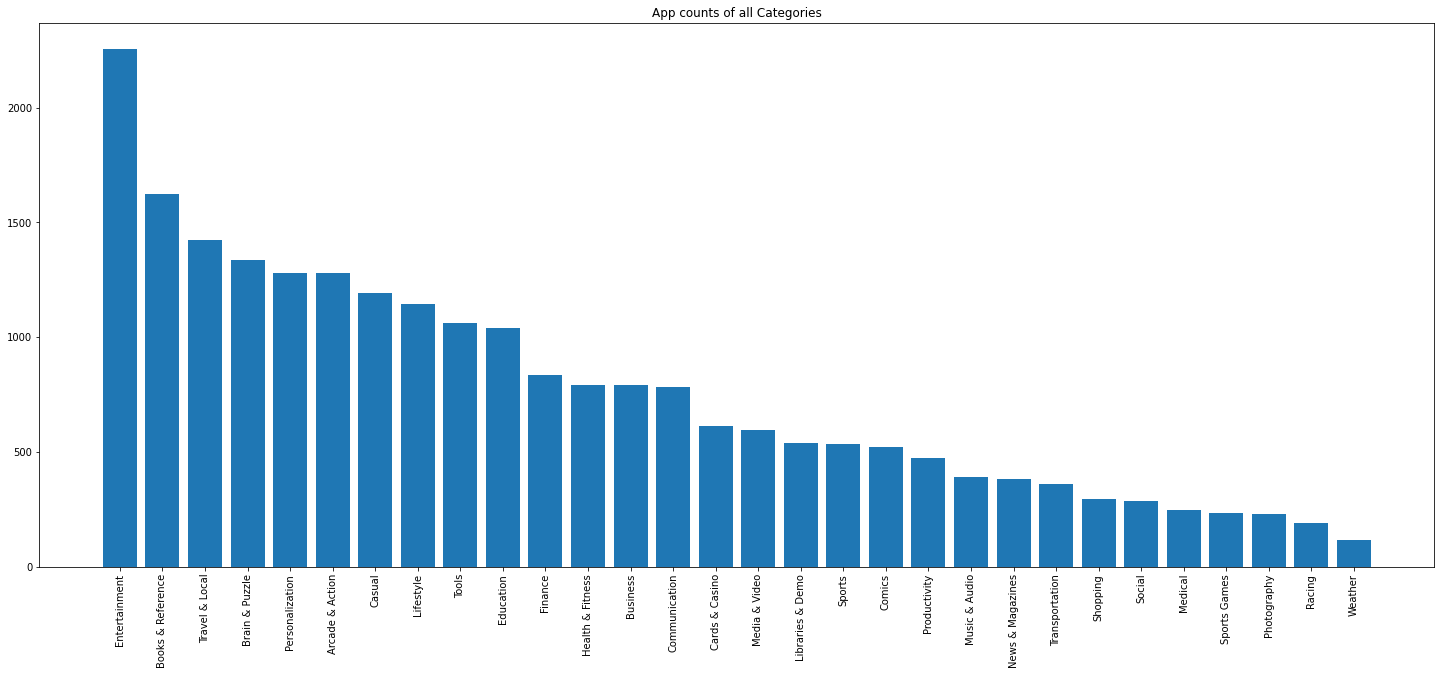

In [ ]:
# Chart - 1 visualization code
# Graph - 1
# Print the total number of unique categories
num_categories = len(df["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = df["Category"].value_counts().sort_values(ascending = False)

# Plotting bar graph to visualise different categories
plt.figure(figsize=(25,10))
plt.bar(num_apps_in_category.index, # index = category name
        num_apps_in_category.values) # value = count
plt.xticks(rotation=90)   
plt.title('App counts of all Categories')
plt.show()

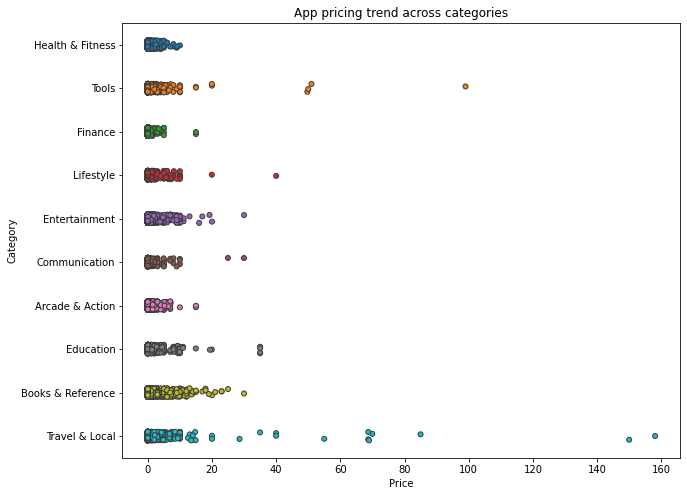

In [ ]:
# GRAPH - 2
# Select a few popular app categories
popular_app_cates = df[df.Category.isin(['Entertainment','Travel & Local','Books & Reference','Arcade & Action','Brain & Puzzel','Causual','Personalisation','Lifestyle','Tools',
                                         'Education','Communication','Finance','Health & Fitness','Buisness'])]

# Examine the price trend by plotting Price vs Category
plt.figure(figsize=(10,8))

# Ploting Strip plot of price & category 
ax = sns.stripplot(x = popular_app_cates["Price"], y = popular_app_cates["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

plt.show()

In [ ]:
# Apps whose Price is greater than 100
apps_above_100 = df[['Category', 'App', 'Price']][df["Price"] > 100]
apps_above_100

,Category,App,Price
15934,Travel & Local,CoPilot Truck UK + IRE,158.07
18890,Travel & Local,CoPilot Truck USA & CAN,149.99
29041,Transportation,NavTruck Regional,139.99


In [ ]:
# Apps whose Price is between 50 And 100
bet50_100 = df[['Category', 'App', 'Price']][(df['Price'] >= 50) & (df['Price'] < 100)]
bet50_100

,Category,App,Price
1395,Travel & Local,CoPilot Live Europe,84.99
16389,Travel & Local,CoPilot Live Premium Europe,54.99
10600,Tools,Compass Emergency Recovery,51.00
22121,Medical,Handbook,65.00
9596,Medical,Handbook of Massachusetts,59.95
22712,Travel & Local,NAVIGON East EU North,68.69
397,Travel & Local,NAVIGON Europe,69.95
5227,Travel & Local,NAVIGON Nordics,68.92
10453,Travel & Local,NAVIGON UK,68.69
13640,Medical,Pschyrembel KW 2012,65.97


##### 1. Why did you pick the specific chart?

A **bar plot** in Python is a visual representation of data using bars of different heights. It is a type of plot that displays the relationship between a variable and one or more other variables, usually in the form of a bar chart. A bar plot can indicate the differences between groups and makes it easy to compare the same data points across multiple categories. Bar plots are commonly used in data visualization to display quantitative information about a set of variables.

A **strip plot** is a type of data visualization that displays a set of points or markers along a horizontal or vertical axis. This type of plot is often used to show relationships between two variables. The data points can be connected by lines or an area chart, allowing viewers to quickly see how the data relates. Strip plots are also commonly used to highlight outliers or unusual values in the data set.

##### 2. What is/are the insight(s) found from the chart?

**GRAPH - 1:** We can see that there are 30 unique app categories present in our dataset. Entertainment apps have the highest market prevalence. After that Travel & Local has a prevalence. Interestingly, Books & Reference, Arcade & Action, Brain & Puzzle and Casual apps have slightly equal weightage of market prevalence.

**GRAPH - 2:** There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. 

Different categories demand different price ranges. Some apps that are simple and used daily should probably be kept free. Here, we see that Travel & Local app are the most expensive. Entertainment and Education app has almost same pricing range.


#### Chart - 2 Rating Vs. Total Counts & Price of Mobile Apps (Bivariate Plots)

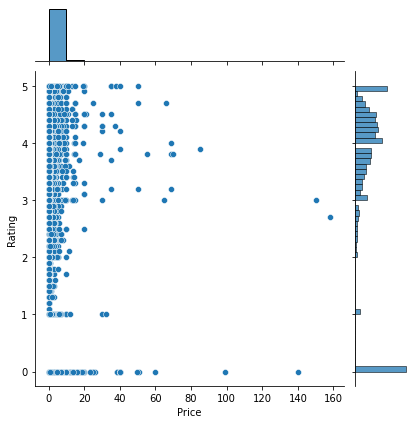

In [ ]:
# Chart - 2 visualization code
# GRAPH - 1
# Filter rows where both Rating and Price values are not null
apps_with_price_and_rating_present = df[(~df["Rating"].isnull()) & (~df["Price"].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_price_and_rating_present.groupby("Category")#.filter(lambda x: len(x) >= 250).reset_index()

# Plot price vs. rating
sns.jointplot(x = df["Price"], y = df["Rating"])
plt.show()

Number of average rating =  4.0


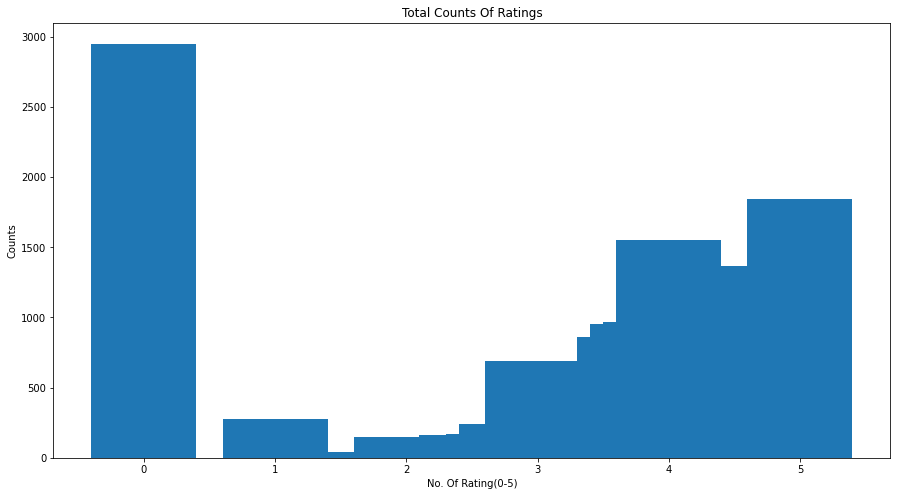

In [ ]:
# Graph - 2
# Print the total number of average rating
num_rating = df["Rating"].median()
print('Number of average rating = ', num_rating)

# Count the number of apps in each 'Category' and sort them in descending order
num_rating_counts = df["Rating"].value_counts().sort_values()

#Plotting bar graph to visualise different categories
plt.figure(figsize=(15,8))
plt.bar(num_rating_counts.index,       # index = ratings (0-5 star)
        num_rating_counts.values)      # value = count 
plt.xlabel('No. Of Rating(0-5)')
plt.ylabel('Counts')
plt.title('Total Counts Of Ratings')
plt.show()

##### 1. Why did you pick the specific chart?

A **Jointplot** comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y). It is very helpful to have univariate and bivariate plots together in one figure. This is because the univariate analysis focuses on one variable, and the bivariate analysis explores the relationship between two variables and also describes the strength of their relationship. 

A **bar plot** in Python is a visual representation of data using bars of different heights. It is a type of plot that displays the relationship between a variable and one or more other variables, usually in the form of a bar chart. A bar plot can indicate the differences between groups and makes it easy to compare the same data points across multiple categories. Bar plots are commonly used in data visualization to display quantitative information about a set of variables.



##### 2. What is/are the insight(s) found from the chart?

**GRAPH - 1:** It is showing the relation between ratings and price of the app. This graph can analyze us that does the price of an app affect its rating?
We find that the majority of top rated apps (rating over 4) range has the vast majority of apps price themselves under $10.

**GRAPH - 2:** After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our graph no. 2, we found that the average number of ratings across all app categories is 4.0 . Also we have large amount of app with 0 ratings.

#### Chart - 3 Category Vs. Dangerous Permission Count and Safe Permission Count 

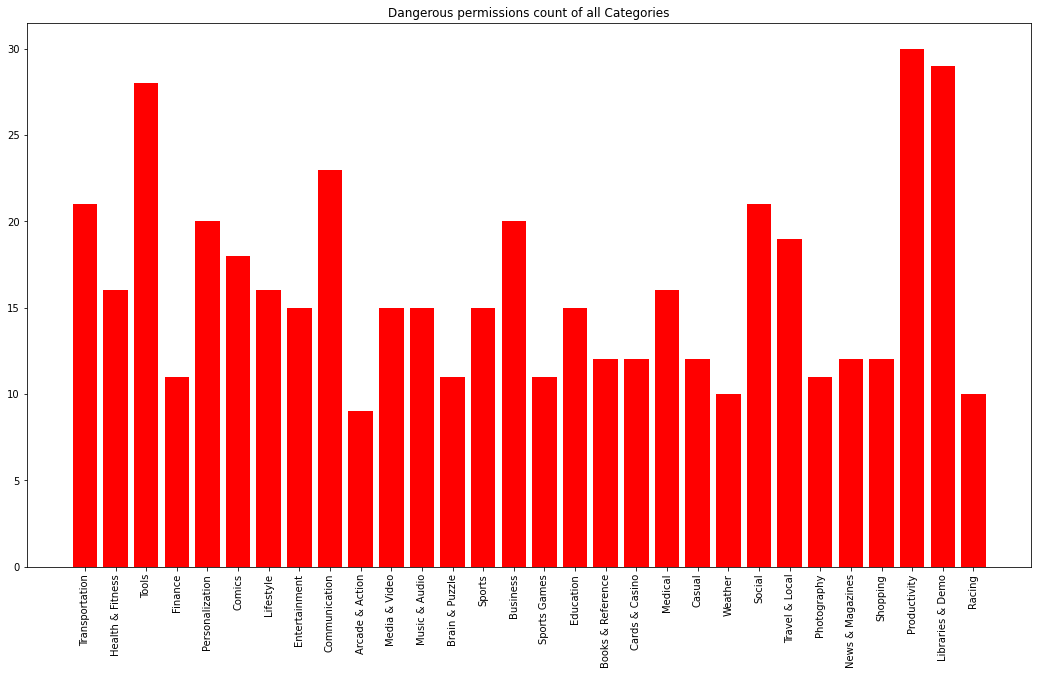

In [ ]:
# Chart - 3 Visualization Code
# Graph - 1
y = df['Dangerous permissions count']
x = df["Category"]

# Plotting bar graph to visualise different categories
plt.figure(figsize=(18,10))
plt.bar(x, y, color='red')
plt.title('Dangerous permissions count of all Categories')
plt.xticks(rotation=90)
plt.show()


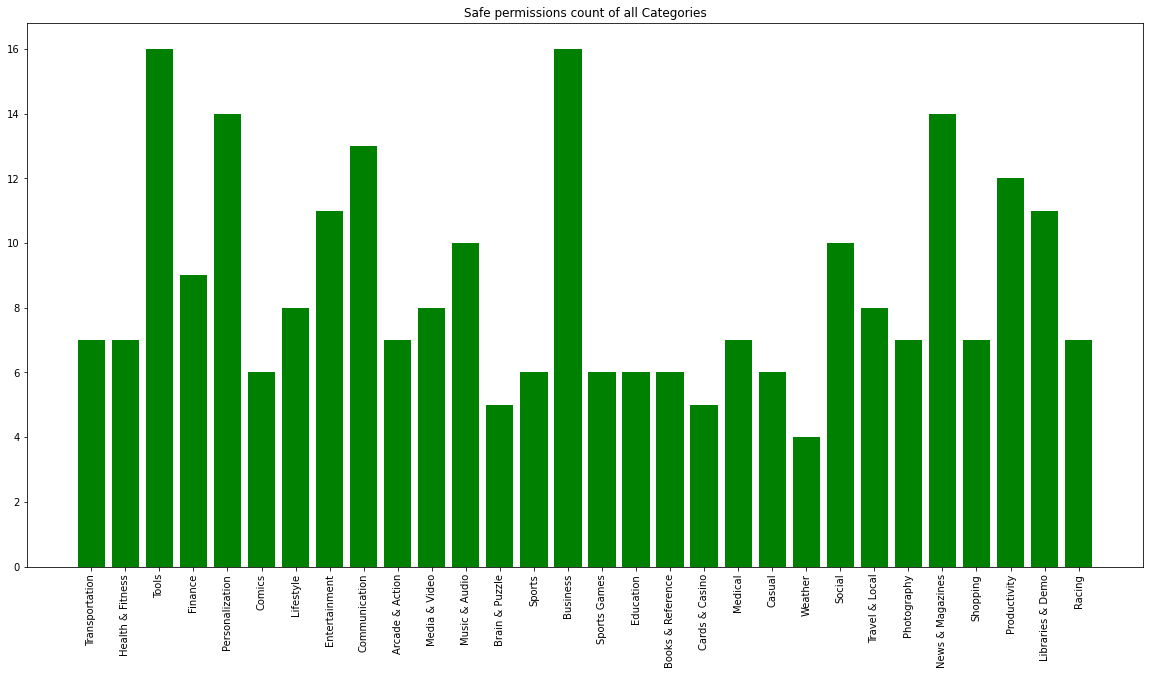

In [ ]:
# Graph - 2
x = df["Category"]
y = df['Safe permissions count']

# Plotting bar graph to visualise different categories
plt.figure(figsize=(20,10))
plt.bar(x, y, color='green')
plt.title('Safe permissions count of all Categories')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

* Easy to understand: Bar charts are a simple and effective way to represent data. They are easy to understand and interpret, making them a popular choice for presenting data in reports and presentations.

* Comparing data: Bar charts are particularly useful for comparing data between different categories. They allow us to quickly see which category has the highest or lowest values.

* Customization: Matplotlib provides a lot of customization options for bar charts. You can change the color, width, and style of the bars, as well as the font, size, and color of the labels and axis.

* Multiple datasets: Bar charts can be used to represent multiple datasets on the same chart. This makes it easy to compare data from different sources or over different time periods.

* Visual appeal: Bar charts are visually appealing and can be used to create attractive and informative visualizations. They are a great way to present data in a way that is both informative and engaging.





##### 2. What is/are the insight(s) found from the chart?

We have found the Safe and Dangerous permission counts in different categories in our data
* Productivity category has highest number of Dangerous permission count followed by Libraries and demo then tool comes third in the list
* Business category has highest number of Safe permission count followed by Tools and demo then News and magzine comes third in the list

#### Chart - 4 Category Vs. Rating and No. of Ratings (Univariate with Categorical and Numerical)

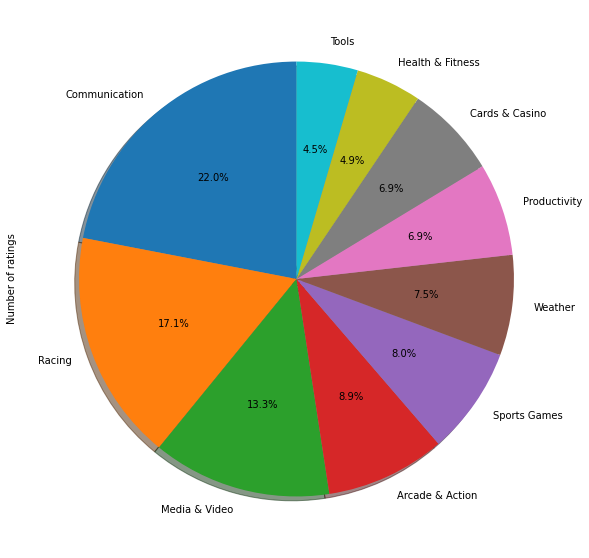

In [ ]:
# Chart - 4 visualization code
# Graph - 1
# Pie Plot of group of data by Category and Median of Number of Ratings for each Category
# For Top 10 category only
df.groupby('Category')['Number of ratings'].median().sort_values(ascending=False).head(10).plot(kind='pie',
                                                                                                figsize=(20,10),
                                                                                                autopct="%1.1f%%",
                                                                                                startangle=90,
                                                                                                shadow=True) 
                                
plt.show()

##### 1. Why did you pick the specific chart?

A **pie chart** is a circular graphical representation of data in which the individual categories are represented as slices that represent the relative size or proportion of each category. It is usually used to show relative proportions of different categories of data. So, we used Pie chart which helped me to get the rating and no. of ratings percentage comparision of the different categories.


##### 2. What is/are the insight(s) found from the chart?

**GRAPH -1:** This pie plot shows us that category of Racing, Communication & Productivity has almost equal average of number of ratings. Other categories has slightly less number of average rating.

**GRAPH-2:** As ratings is important for mobile app to get a popularity, we are checking here the average rating of different category. Every category has equal weightage of average ratings.

#### Chart - 5

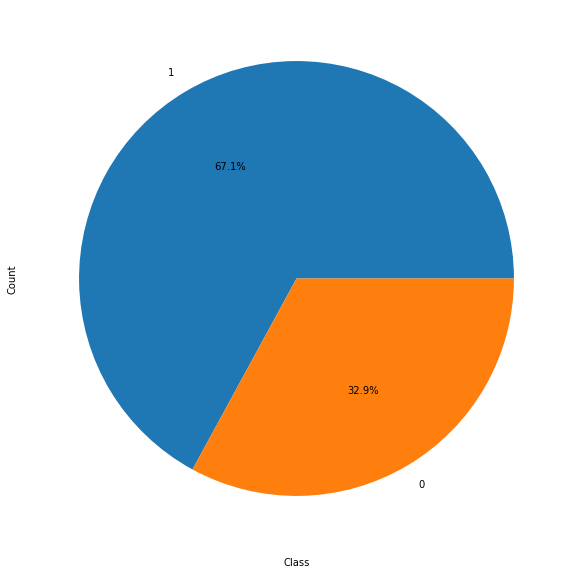

In [ ]:
# Chart - 5 visualization code
import pandas as pd
import matplotlib.pyplot as plt

# assume your data is in a pandas dataframe df with a 'class' column
class_counts = df['Class'].value_counts()
class_counts.plot(kind='pie',figsize=(10,10),autopct="%1.1f%%")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

To check the data Imbalancement

##### 2. What is/are the insight(s) found from the chart?

Our Data is imbalanced
To handle imbalanced data, there are several techniques we can use, such as:

* Undersampling: randomly removing samples from the majority class to balance the class distribution.
* Oversampling: randomly duplicating samples from the minority class to balance the class distribution.
* Synthetic data generation: using techniques like SMOTE to generate synthetic samples for the minority class.
* Class weighting: assigning higher weights to the minority class during model training to compensate for the class imbalance.

#### Chart - 5 - Correlation Heatmap

In [ ]:
cvdf = df.iloc[:,:10]

In [ ]:
# Correlation Heatmap visualization code
# assume your data is in a pandas dataframe df with multiple features and a 'class' column
corr_matrix = cvdf.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_matrix.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count
Rating,1.00,0.06,-0.15,0.08,0.12
Number of ratings,0.06,1.00,-0.02,0.11,0.12
Price,-0.15,-0.02,1.00,-0.00,-0.04
Dangerous permissions count,0.08,0.11,-0.00,1.00,0.70
Safe permissions count,0.12,0.12,-0.04,0.70,1.00


##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

We can see the relation between the variables. All the given variable has negetive correlation with the price this means as price is incresing, rating and number of ratings is decresing. While dangerous count has no correlation with the price.

Rest all correlation can be depicted from the above chart.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
cvdf = df.iloc[:,:10]
sns.pairplot(cvdf)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, we used pair plot to analyse the patterns of data and realationship between the first 10 important features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we got to know, there are less linear relationship between variables and data points aren't linearly separable. some data is clusetered and ovearlapped each other. Dangerous Permission Count and Safe Permission Count has slightly linear realtionship. Rest insights can be depicted from the above graph.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1 : The app's rating is a significant predictor of its authenticity

#### 1. Stating our research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The app's rating is not significantly related to its authenticity.
* **Alternative hypothesis:** The app's rating is significantly related to its authenticity.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Separate the ratings into two groups based on Class
authentic_ratings = df[df['Class'] == 1]['Rating']
fake_ratings = df[df['Class'] == 0]['Rating']

# Test assumptions
# Check if the variances of the two groups are equal
var_equal = stats.levene(authentic_ratings, fake_ratings)[1] > 0.05
# Check if the df follows a normal distribution
normal_dist = stats.shapiro(df['Rating'])[1] > 0.05

# Conduct the t-test
if var_equal and normal_dist:
    t_stat, p_val = stats.ttest_ind(authentic_ratings, fake_ratings, equal_var=True)
else:
    t_stat, p_val = stats.ttest_ind(authentic_ratings, fake_ratings, equal_var=False)

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: -46.715659670212105
p-value: 0.0


##### Which and Why did we choose the specific statistical test?

The t-statistic represents the difference between the means of the two groups (authentic and fake app ratings) relative to the variability in the data. In this case, the negative t-statistic value indicates that the mean rating of the fake apps is lower than the mean rating of the authentic apps.

The p-value is the probability of observing the difference in mean ratings between the authentic and fake apps, or a more extreme difference, assuming that the null hypothesis (that there is no significant relationship between app rating and authenticity) is true. A p-value of 0.0 means that the probability of observing the difference in mean ratings or more extreme differences is extremely low, virtually zero. Therefore, we reject the null hypothesis and conclude that there is a statistically significant relationship between app rating and authenticity.

In summary, the output suggests that the app's rating is a significant predictor of its authenticity, and the mean rating of authentic apps is significantly higher than that of fake apps.





### Hypothetical Statement - 2: The app's category is a significant predictor of its authenticity.


#### 1. Stating our research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The app's category is not significantly related to its authenticity.
* **Alternative hypothesis:** The app's category is significantly related to its authenticity.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Create a contingency table of observed frequencies
cont_table = pd.crosstab(df['Class'], df['Category'])

# Conduct the chi-square test
chi_stat, p_val, dof, expected = stats.chi2_contingency(cont_table)

print("Chi-square statistic:", chi_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)


Chi-square statistic: 5080.421312454469
Degrees of freedom: 29
p-value: 0.0


##### Which and Why did we choose the specific statistical test?

The chi-square statistic measures the difference between the observed and expected frequencies in each cell of the contingency table. In this case, the large chi-square statistic indicates a significant difference between the observed and expected frequencies, suggesting that there is a relationship between app category and authenticity.

The degrees of freedom represent the number of independent observations in the contingency table. In this case, the degrees of freedom is 29, which is the number of categories minus one, multiplied by the number of authenticity levels minus one.

The p-value is the probability of observing the relationship between app category and authenticity, or a more extreme relationship, assuming that there is no relationship between the two variables (i.e., the null hypothesis). A p-value of 0.0 indicates that the probability of observing the relationship or a more extreme relationship by chance is essentially zero. Therefore, we reject the null hypothesis and conclude that there is a statistically significant relationship between app category and authenticity.

In summary, the output suggests that the app's category is a significant predictor of its authenticity, and there is a significant relationship between app category and authenticity.




### Hypothetical Statement - 3: The number of reviews is a significant predictor of an app's authenticity.

#### 1. Stating our research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The number of reviews is not significantly related to an app's authenticity.
* **Alternative hypothesis:** The number of reviews is significantly related to an app's authenticity



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Define the contingency table
contingency_table = pd.crosstab(df['Class'], df['Number of ratings'])

# Conduct the chi-square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)


Chi-square statistic: 8568.326856007443
Degrees of freedom: 3691
p-value: 0.0


##### Which and Why did we choose the specific statistical test?

The result of the chi-square test in the code provided indicates that the p-value is 0.0, which is less than the typical significance level of 0.05. This means that we reject the null hypothesis that the number of ratings is not significantly related to the Class of the app and conclude that there is a significant relationship between the number of ratings and the Class of the app.

The chi-square statistic is a measure of how different the observed values are from the expected values under the null hypothesis. In this case, the observed values are the contingency table of the number of ratings and Class, and the expected values are calculated assuming the null hypothesis is true. The degrees of freedom tell us how many values can vary freely in the chi-square distribution. The large chi-square statistic and degrees of freedom indicate that there are many categories with large differences between the observed and expected values, supporting the conclusion of a significant relationship between the number of ratings and the Class of the app.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Handling Missing Values & Missing Value Imputation
df.iloc[:, :10].isnull().sum()

App                              0
Package                          0
Category                         0
Description                      3
Rating                           0
Number of ratings                0
Price                            0
Related apps                   660
Dangerous permissions count    183
Safe permissions count           0
dtype: int64

Handling missing values in Description Column

In [41]:
# Filter the rows where the Description column has null values
df[df['Description'].isnull()]

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delet

In [42]:
# filling the null values using fillna() 
df['Description'] = df['Description'].fillna('Not available')

Handling null values in Related apps Column

In [43]:
# Filter the rows where the Related apps column has null values
df[df['Related apps'].isnull()].head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delet

In [44]:
# filling the null values using fillna() with 'no relatad apps found' tag
df['Related apps'] = df['Related apps'].fillna('No related apps found')

Handling null values in Dangerous Permission Count column

In [45]:
# Median of independent column Dangerous permissions count
df['Dangerous permissions count'].median()

2.0

In [46]:
# According to CLT here we use median
# Calculate the median of non-null values in Dangerous permissions count column
mean_Dangerous= df['Dangerous permissions count'].median()

# Fill the missing values with the median value
df['Dangerous permissions count'] = df['Dangerous permissions count'].fillna(mean_Dangerous)
# Display the result
df.head()


,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delet

In [47]:
# Checking Data after Null value Treatment
df.iloc[:, :10].isnull().sum()

App                            0
Package                        0
Category                       0
Description                    0
Rating                         0
Number of ratings              0
Price                          0
Related apps                   0
Dangerous permissions count    0
Safe permissions count         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Generally, there are two approch to handle the missing values **i.e. Deleting the Missing values and Imputing the Missing Values**. 

We have used both of the methoda here. 
* For the Apps column where one row has a null values, we used first approch that is Deleting the missing values.
* While another columns has more number of rows with null values so there we have use second approch of imputing the null values. Here, in the Description column, we are imputing the null values with arbitary values and made an educated guess about the missing value with 'Not Available' tag. 
* Next, in realated apps column, we have filled the values with a string commenting 'No related app found'.
* Last and important column, Dangerous Permission Count has maximum number of missing value with 755 rows so here we have used the second approch where we have imputed the missing value with the median. The median is the middlemost value. It’s better to use the median value for imputation in the case of outliers. 



### 2. Handling Outliers

In [48]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Our mostly data is binary
as binary data can only take on two values (e.g., 0 or 1). Outliers are values that fall far outside the typical range of a dataset, but with binary data, there are no intermediate values that could be considered outliers.

### 3. Categorical Encoding

In [69]:
# Encode your categorical columns
# Creating dummy variable using one hot encoding for category column
dummy_category = pd.get_dummies(df.Category, prefix='Category')
New_df=df.join(dummy_category)
New_df.head(5)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delet

In [70]:
# dropping category column as it is not needed now
New_df.drop('Category', axis=1, inplace=True)
New_df.head(2)

,App,Package,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB sto

In [71]:
# Checking shape of the data after encoding the category column
New_df.shape

(22823, 213)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here we are using **one hot encoding** is a technique used to represent categorical variables as numerical values in a machine learning model. As the category column in our dataset is an important feature for evalution, we have to convert it into numeric for model implementation so we have used this technique. The advantages of using one hot encoding includes:
* It allows the use of categorical variables in models that require numerical input.
* It can improve model performance by providing more information to the model about the categorical variable.
* It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).

### 4. Textual Data Preprocessing 


#### Removing Punctuations

In [72]:
# Remove Punctuations
# Checking unique values in app column
New_df['App'].nunique()

22823

In [73]:
import re

# Regular expression pattern to match non-English and special characters
non_english_pattern = re.compile(r'[^\w\s]+|[^\x00-\x7F]+')

# Replace non-English and special characters with empty string
New_df['App'] = New_df['App'].str.replace(non_english_pattern, '')
New_df.tail(2)

,App,Package,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB sto

In [74]:
# Checking the length of rows for empty string
len(New_df[(New_df['App']=='')])

52

In [75]:
# drop rows where 'App' column has empty strings
# Because we have huge dataset and removing 52 rows will not affect our imputation
New_df = New_df.drop(index=New_df[New_df['App'] == ''].index)

In [76]:
# Shape after removing 52 col
New_df.shape

(22771, 213)

In [77]:
# No rows with empty string 
len(New_df[(New_df['App']=='')])

0

In [78]:
New_df.head()

,App,Package,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB sto

### 5.Handling Data Imbalanced

In [79]:
New_df.shape

(22771, 213)

[Text(0, 0, 'Benign'), Text(1, 0, 'Malware')]

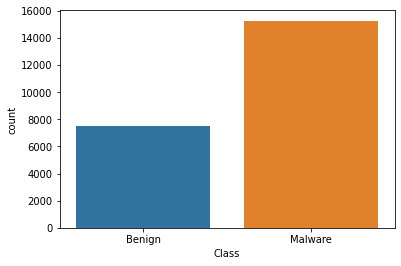

In [81]:
cp = sns.countplot(New_df['Class'])
cp.set_xticklabels(['Benign','Malware'])

Here Majority class is Malware 66.66%

& Minority Class is Benign 33.33%

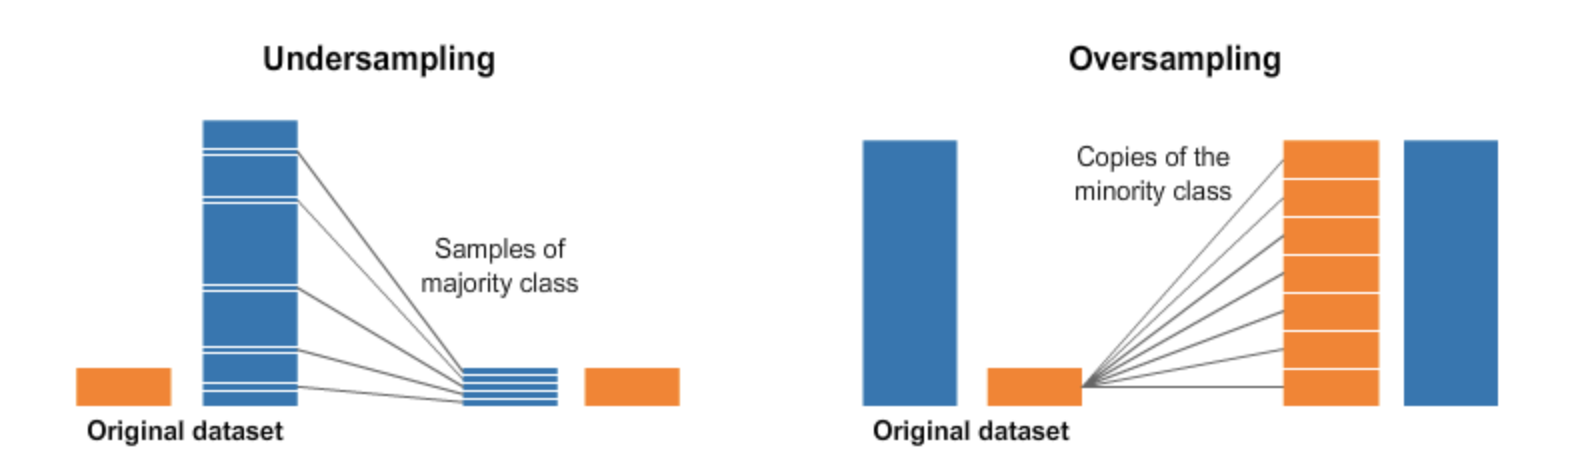

In [82]:
# Class count
class_count_0, class_count_1 = New_df['Class'].value_counts()

# Separate class
class_0 = New_df[New_df['Class'] == 0]
class_1 = New_df[New_df['Class'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
  

class 0: (7508, 213)
class 1: (15263, 213)


* Class 1 is Majority 
* Class_0 is Minority

##### i) Random Under sampling

In [83]:
from sklearn.utils import resample

# Define the majority and minority classes
majority_class = 1
minority_class = 0

# Separate the New_df into majority and minority classes
majority_data = New_df[New_df['Class'] == majority_class]
minority_data = New_df[New_df['Class'] == minority_class]

# Determine the size of the majority class
n_majority = len(majority_data)

# Randomly undersample the majority class
undersampled_majority = resample(majority_data,
                                 replace=False,  # sample without replacement
                                 n_samples=len(minority_data),  # match minority n
                                 random_state=42)  # reproducible results

# Combine the minority class with the undersampled majority class
undersampled_data = pd.concat([minority_data, undersampled_majority])

# Shuffle the New_df to ensure randomness
undersampled_data = undersampled_data.sample(frac=1, random_state=42)


In [84]:
undersampled_data['Class'].value_counts()

1    7508
0    7508
Name: Class, dtype: int64

<AxesSubplot:title={'center':'count (Class)'}>

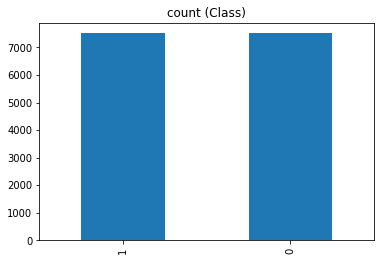

In [85]:
undersampled_data['Class'].value_counts().plot(kind='bar', title='count (Class)')


##### ii) Random Under sampling

In [86]:
# Randomly oversample the minority class
oversampled_minority = resample(minority_data,
                                 replace=True,  # sample with replacement
                                 n_samples=len(majority_data),  # match majority n
                                 random_state=42)  # reproducible results

# Combine the majority class with the oversampled minority class
oversampled_data = pd.concat([majority_data, oversampled_minority])

# Shuffle the data to ensure randomness
oversampled_data = oversampled_data.sample(frac=1, random_state=42)

In [87]:
oversampled_data['Class'].value_counts()

1    15263
0    15263
Name: Class, dtype: int64

<AxesSubplot:title={'center':'count (Class)'}>

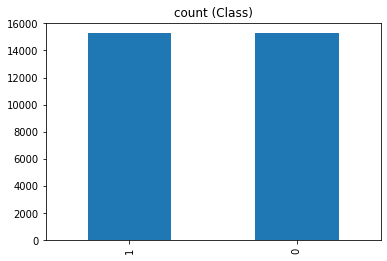

In [88]:
oversampled_data['Class'].value_counts().plot(kind='bar', title='count (Class)')


In [89]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(New_df.drop(['App','Class'],axis=1), New_df['Class'])

print('Original dataset shape:', len(New_df))
print('Resampled dataset shape', len(y_ros))


Original dataset shape: 22771
Resampled dataset shape 30526


##### 3.Under sampling Tomek links

In [90]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()

In [95]:
X_tl, y_tl = tl.fit_resample(New_df.drop(['App','Class','Package','Description','Related apps'],axis=1), New_df['Class'])

print('Original dataset shape:', len(New_df))
print('Resampled dataset shape', len(y_tl))
print('Difference: ', len(New_df) - len(y_tl))

Original dataset shape: 22771
Resampled dataset shape 21414
Difference:  1357


##### 4.Synthetic Minority Oversampling Technique (SMOTE)


In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(New_df.drop(['App','Class','Package','Description','Related apps'],axis=1), New_df['Class'])

print('Original dataset shape', len(New_df))
print('Resampled dataset shape', len(y_smote))
     

Original dataset shape 22771
Resampled dataset shape 30526


##### 5. Penalize Algorithms (Cost-Sensitive Training)

In [ ]:
# Select your features wisely to avoid overfitting
X = New_df.drop(['App','Class'],axis=1)
Y = New_df['Class']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [101]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
     

ROCAUC score: 0.5712137065417308
Accuracy score: 0.6904500548847421


##### 6. Try Tree Based Algorithms

##### XGboost using Tomeklink

In [107]:
# ML Model - 7 Implementation
# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(learning_rate=0.01, 
                              n_estimators=5000, 
                              max_depth=4,
                              min_child_weight=6,
                              gamma=0,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              objective= 'binary:logistic',
                              nthread=4,
                              scale_pos_weight=1,
                              reg_alpha = 0.005,
                              reg_lambda = 3,
                              seed=27)

# Train the model using the training data
# Use of early stopping technique is to prevent overfitting by just set the early_stopping_rounds argument during fit().
xgb_model.fit(X_tl, y_tl, early_stopping_rounds=100, eval_set=[(X_test, y_test)], eval_metric='auc', verbose=100)


[0]	validation_0-auc:0.81435
[100]	validation_0-auc:0.86837
[200]	validation_0-auc:0.87978
[300]	validation_0-auc:0.88814
[400]	validation_0-auc:0.89523
[500]	validation_0-auc:0.90148
[600]	validation_0-auc:0.90604
[700]	validation_0-auc:0.90943
[800]	validation_0-auc:0.91199
[900]	validation_0-auc:0.91409
[1000]	validation_0-auc:0.91613
[1100]	validation_0-auc:0.91757
[1200]	validation_0-auc:0.91908
[1300]	validation_0-auc:0.92021
[1400]	validation_0-auc:0.92125
[1500]	validation_0-auc:0.92212
[1600]	validation_0-auc:0.92297
[1700]	validation_0-auc:0.92371
[1800]	validation_0-auc:0.92444
[1900]	validation_0-auc:0.92513
[2000]	validation_0-auc:0.92558
[2100]	validation_0-auc:0.92624
[2200]	validation_0-auc:0.92688
[2300]	validation_0-auc:0.92746
[2400]	validation_0-auc:0.92804
[2500]	validation_0-auc:0.92863
[2600]	validation_0-auc:0.92913
[2700]	validation_0-auc:0.92974
[2800]	validation_0-auc:0.93025
[2900]	validation_0-auc:0.93071
[3000]	validation_0-auc:0.93109
[3100]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [108]:
y_pred = xgb_model.predict(X_test)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
8361,0,0
1773,0,1
11414,1,1
17956,0,0
22045,0,0
5001,1,1
19605,1,1
1037,1,0
14712,1,1
18495,1,1


In [109]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
     

ROCAUC score: 0.8645429851583412
Accuracy score: 0.8608122941822174


In [110]:

# Classification Report of the model
print(classification_report(y_test,y_pred, labels=None))

# Confusion Matrix using heatmap
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',cm)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1502
           1       0.93      0.85      0.89      3053

    accuracy                           0.86      4555
   macro avg       0.84      0.86      0.85      4555
weighted avg       0.87      0.86      0.86      4555

Confusion matrix

 [[1315  187]
 [ 447 2606]]


he results indicate the performance of an Android Authenticity Prediction model that classifies apps as either malware (class 1) or benign (class 0).

The precision for class 0 is 0.75, which means that out of all the apps predicted as benign, 75% of them are truly benign. The recall for class 0 is 0.88, which means that out of all the actual benign apps, the model correctly identifies 88% of them. The F1-score for class 0 is 0.81, which is the harmonic mean of precision and recall.

The precision for class 1 is 0.93, which means that out of all the apps predicted as malware, 93% of them are truly malware. The recall for class 1 is 0.85, which means that out of all the actual malware apps, the model correctly identifies 85% of them. The F1-score for class 1 is 0.89.

The overall accuracy of the model is 0.86, which means that out of all the apps in the dataset, the model correctly classified 86% of them.

The macro-averaged F1-score is 0.85, which is the average of the F1-scores for both classes. The weighted-averaged F1-score is also 0.86, which takes into account the class imbalance in the dataset.

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives for each class. In this case, there are 1,315 true negatives (benign apps correctly classified), 187 false negatives (benign apps incorrectly classified as malware), 447 false positives (malware apps incorrectly classified as benign), and 2,606 true positives (malware apps correctly classified).

##### XGboost using SMOTE

In [102]:
# ML Model - 7 Implementation
# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(learning_rate=0.01, 
                              n_estimators=5000, 
                              max_depth=4,
                              min_child_weight=6,
                              gamma=0,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              objective= 'binary:logistic',
                              nthread=4,
                              scale_pos_weight=1,
                              reg_alpha = 0.005,
                              reg_lambda = 3,
                              seed=27)

# Train the model using the training data
# Use of early stopping technique is to prevent overfitting by just set the early_stopping_rounds argument during fit().
xgb_model.fit(x_smote, y_smote, early_stopping_rounds=100, eval_set=[(X_test, y_test)], eval_metric='auc', verbose=100)


[0]	validation_0-auc:0.81665
[100]	validation_0-auc:0.87053
[200]	validation_0-auc:0.88290
[300]	validation_0-auc:0.89268
[400]	validation_0-auc:0.90039
[500]	validation_0-auc:0.90520
[600]	validation_0-auc:0.90895
[700]	validation_0-auc:0.91197
[800]	validation_0-auc:0.91428
[900]	validation_0-auc:0.91650
[1000]	validation_0-auc:0.91859
[1100]	validation_0-auc:0.92034
[1200]	validation_0-auc:0.92179
[1300]	validation_0-auc:0.92302
[1400]	validation_0-auc:0.92402
[1500]	validation_0-auc:0.92495
[1600]	validation_0-auc:0.92587
[1700]	validation_0-auc:0.92665
[1800]	validation_0-auc:0.92734
[1900]	validation_0-auc:0.92801
[2000]	validation_0-auc:0.92865
[2100]	validation_0-auc:0.92923
[2200]	validation_0-auc:0.92981
[2300]	validation_0-auc:0.93028
[2400]	validation_0-auc:0.93075
[2500]	validation_0-auc:0.93131
[2600]	validation_0-auc:0.93180
[2700]	validation_0-auc:0.93226
[2800]	validation_0-auc:0.93270
[2900]	validation_0-auc:0.93317
[3000]	validation_0-auc:0.93366
[3100]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [103]:
y_pred = xgb_model.predict(X_test)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
8361,0,0
1773,0,1
11414,1,1
17956,0,0
22045,0,0
5001,1,1
19605,1,1
1037,1,0
14712,1,1
18495,1,1


In [104]:
print('ROCAUC score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
     

ROCAUC score: 0.8641459820141547
Accuracy score: 0.8632272228320527


In [105]:

# Classification Report of the model
print(classification_report(y_test,y_pred, labels=None))

# Confusion Matrix using heatmap
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',cm)

              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1502
           1       0.93      0.86      0.89      3053

    accuracy                           0.86      4555
   macro avg       0.84      0.86      0.85      4555
weighted avg       0.87      0.86      0.87      4555

Confusion matrix

 [[1302  200]
 [ 423 2630]]


The performance of an Android Authenticity Prediction model is evaluated using several metrics, including precision, recall, and F1-score. The goal of the model is to accurately classify apps as either malware (class 1) or benign (class 0).

The precision for class 0 is 0.75, which means that when the model predicts an app to be benign, it is correct 75% of the time. The recall for class 0 is 0.87, which means that out of all the actual benign apps, the model correctly identifies 87% of them. The F1-score for class 0 is 0.81, which is the harmonic mean of precision and recall.

The precision for class 1 is 0.93, which means that when the model predicts an app to be malware, it is correct 93% of the time. The recall for class 1 is 0.86, which means that out of all the actual malware apps, the model correctly identifies 86% of them. The F1-score for class 1 is 0.89.

The overall accuracy of the model is 0.86, which means that out of all the apps in the dataset, the model correctly classified 86% of them.

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives for each class. In this case, there are 1,302 true negatives (benign apps correctly classified), 200 false negatives (benign apps incorrectly classified as malware), 423 false positives (malware apps incorrectly classified as benign), and 2,630 true positives (malware apps correctly classified).





#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
New_df.head(2)

,App,Package,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB sto

In [97]:
# Deleting the features which is not necessary for our model implementation
New_df.drop(['Package','Related apps','Description'], axis=1, inplace=True)
New_df.head(2)

,App,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),Default : permanently disable device (S),Default : permission to install a location provider (S),Default : power device on or off (S),Default : press keys and control buttons (S),Default : prevent app switches (S),Default : read frame buffer (S),Default : read instant messages (S),Default : read phone state and identity (S),Default : record what you type and actions you take (S),Default : reset system to factory defaults (S),Default : run in factory test mode (S),Default : set time (S),Default : set wallpaper size hints (S),Default : start IM service (S),Default : update component usage statistics (S),Default : write contact data (S),Default : write instant messages (S),Development tools : enable application debugging (D),Development tools : limit number of running processes (D),Development tools : make all background applications close (D),Development tools : send Linux signals to applications (D),Hardware controls : change your audio settings (D),Hardware controls : control flashlight (S),Hardware controls : control vibrator (S),Hardware controls : record audio (D),Hardware controls : take pictures and videos (D),Hardware controls : test hardware (S),Network communication : Broadcast data messages to applications. (S),Network communication : control Near Field Communication (D),Network communication : create Bluetooth connections (D),Network communication : download files without notification (S),Network communication : full Internet access (D),Network communication : make/receive Internet calls (D),Network communication : receive data from Internet (S),Network communication : view Wi-Fi state (S),Network communication : view network state (S),Phone calls : intercept outgoing calls (D),Phone calls : modify phone state (S),Phone calls : read phone state and identity (D),Services that cost you money : directly call phone numbers (D),Services that cost you money : send SMS messages (D),Storage : modify/delete USB storage contents modify/delete SD ca

In [ ]:
New_df.shape

(22771, 212)

#### 2. Feature Selection

In [98]:
# Select your features wisely to avoid overfitting
X = New_df.drop(['App','Class'],axis=1)
Y = New_df['Class']

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Checking important features
mutual_info = mutual_info_classif(X, Y)

# Sort the features by mutual information score
features_by_mi = X.columns[mutual_info.argsort()[::-1]]

# Select the top k features based on mutual information
k = 10
selected_features_mi = features_by_mi[:k]
# 10 most imporatnt features in our dataset
selected_features_mi

Index(['Number of ratings', 'Price', 'Rating', 'Category_Travel & Local',
       'Category_Comics', 'Category_Libraries & Demo', 'Category_Tools',
       'Network communication : view network state (S)',
       'Category_Cards & Casino',
       'Network communication : full Internet access (D)'],
      dtype='object')

##### What all feature selection methods have you used  and why?

We have use **mutual info classif** method.

The reason is mutual_info_classif is a function in the sklearn.feature_selection module that can be used for feature selection. It calculates the mutual information between each feature and the target variable (in a classification problem) and returns the mutual information scores.

Mutual information is a measure of the mutual dependence between two variables. In the context of feature selection, it measures how much information a feature provides about the target variable. Features with high mutual information scores are considered to be more important or informative for predicting the target variable.

Therefore, mutual_info_classif can be useful in identifying the most relevant features for a classification problem, and can help to improve the performance of a machine learning model by reducing the dimensionality of the input data.





##### Which all features you found important and why?

1. Apart from package, Description and related app features , all are important in our data.
2. These are top features in our data which will be used in our classification ML models
* Number of ratings
* Price
* Rating
* Category_Travel & Local     
* Category_Comics
* Category_Libraries & Demo
* Category_Tools
* Network communication : view network state (S)
* Category_Cards & Casino
* Network communication : full Internet access (D)


### 3. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

In [ ]:
X_train.shape, X_test.shape

((18216, 210), (4555, 210))

In [ ]:
y_train.shape, y_test.shape

((18216,), (4555,))

##### What data splitting ratio have you used and why? 

* The test_size parameter is set to 0.20, which means that 20% of the data will be used as the testing set, and the remaining 80% will be used as the training set. The random_state parameter is set to 42 to ensure that the split is reproducible. The stratify parameter is set to Y to ensure that the proportion of each class in the target variable is the same in the training and testing sets.
* By splitting the data into training and testing sets, we can train the model on the training data and evaluate its performance on the testing data. This helps us to avoid overfitting, which occurs when the model performs well on the training data but poorly on the testing data.


## ***7. ML Model Implementation***

### ML Model - 1.  LOGISTIC REGRESSION

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(random_state=0)

# Fit the Algorithm
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predict on the model on training data
train_X_pred = lr.predict(X_train)

# Predict on the model on test data
test_y_pred = lr.predict(X_test)

# Creating Dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':test_y_pred})
df.tail(10)

,Actual,Predicted
5092,0,1
3265,1,0
9855,1,1
20992,0,1
13171,1,0
6344,0,0
19814,1,1
4987,0,0
5294,1,0
6456,1,1


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Precision, Recall, F1-Score using classification report
report = classification_report(y_test, test_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.56      0.44      0.49      1502
           1       0.75      0.83      0.79      3053

    accuracy                           0.70      4555
   macro avg       0.65      0.63      0.64      4555
weighted avg       0.69      0.70      0.69      4555



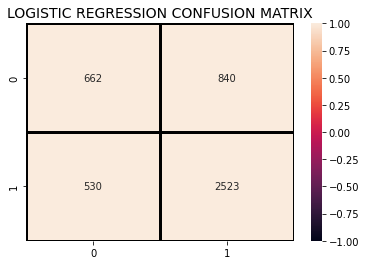

In [ ]:
# Confusion Matrix with heatmap
sns.heatmap(confusion_matrix(y_test, test_y_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3,
            vmin=-1, vmax=1)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
# Accuracy Score of training and testing dataset
train_accuracy = accuracy_score(train_X_pred ,y_train)

test_accuracy = accuracy_score(test_y_pred ,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7026240667545015
The accuracy on test data is  0.6992316136114161


In [ ]:
# AUC_ROC_Curve of test set
auc_score = roc_auc_score(y_test, test_y_pred)
print('roc_auc_score:', auc_score)

roc_auc_score: 0.6335729672370456


In [ ]:
# Log Loss of test set
loss = log_loss(y_test, test_y_pred)
print('The LogLoss is:', loss)

The LogLoss is: 10.840791469394183


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define hyperparameter grid for cross-validation
param_grid = [{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20)}]

# Fit the Algorithm
# Perform grid search with 10-fold cross-validation
# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

# Print best hyperparameter and corresponding mean cross-validation score
print("tuned hpyerparameters :(best parameters) ",best_clf.best_params_)
print("accuracy :",best_clf.best_score_)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
tuned hpyerparameters :(best parameters)  {'C': 11.288378916846883, 'penalty': 'l2'}
accuracy : 0.7027344416374159


In [ ]:
# Fit the algorithm with tuned parameters
# Tuned Parameter: C = '0.615848211066026', penalty = 'l2'
# ML Model Implementation
lr = LogisticRegression(random_state=0, C = 0.615848211066026, penalty = 'l2')

# Fit the Algorithm
lr.fit(X_train, y_train)

# Predict on the model on test data
test_y_pred = lr.predict(X_test)

In [ ]:
# Accuracy Score of test set
test_accuracy = accuracy_score(test_y_pred ,y_test)

print("The accuracy on test data is ", test_accuracy)

The accuracy on test data is  0.7185510428100987


In [ ]:
# Precision, Recall, F1-Score using classification report
report = classification_report(y_test, test_y_pred)
print(report)

#### **RESULT**

**LOGISTIC REGRESSION** is a classification algorithm that predicts the probability of an outcome that can only have two values. A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category. Logistic regression algorithm is used to predict the likelihood of an event occurring. It is based on the assumption that there is some sort of relationship between the input features and the output variable

We have used LR here to predict the estimated likelihood that an individual device is genuine or counterfeit. We have applied Logistic Regression here with hyper-parameter tuning and try to evaluate our reslut by using some different type of evalution metrices i.e. Precision, Recall, F1-Score, Accuracy Score, AUC-ROC Curve. Finally, We have found the test score accuracy of 0.69. After apply cross validation and hyper-parameter tuning, we have found our accuracy score of test data with **71.85%** which is good.

### ML Model - 2. DECISION TREE CLASSIFIER

In [ ]:
# ML Model - 3 Implementation
# creating Instance of the DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the Algorithm
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
# Predict on the model with test data and then training data
y_pred = clf_dt.predict(X_test)
y_pred_train = clf_dt.predict(X_train)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.tail(10)

,Actual,Predicted
5092,0,0
3265,1,0
9855,1,1
20992,0,0
13171,1,1
6344,0,0
19814,1,1
4987,0,0
5294,1,1
6456,1,0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Precision, Recall, F1-Score using classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.59      0.86      0.70      1502
           1       0.91      0.71      0.80      3053

    accuracy                           0.76      4555
   macro avg       0.75      0.78      0.75      4555
weighted avg       0.81      0.76      0.77      4555



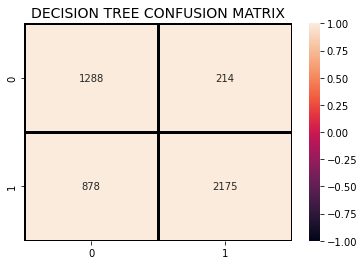

In [ ]:
# Confusion Matrix with heatmap
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3,
            vmin=-1, vmax=1)
    
plt.title("DECISION TREE CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
# Accuracy_Score of the test set
print('Model(Testing-set) accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Model(Testing-set) accuracy score with criterion gini index: 0.7603
Training-set accuracy score: 0.7654


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., Gridsearch CV, Randomsearch CV, Bayesian Optimization etc.)
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20, 25],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'random_state':[0, 5, 10, 15, 20, 35, 50, 80, 100, 150],
              'criterion':['gini','entropy']}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv =10)

# Fit the Algorithm
grid_search.fit(X_train, y_train)

# Print best hyperparameter and corresponding mean cross-validation score
print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7852420323690377
Best params: {'criterion': 'entropy', 'max_depth': 25, 'max_features': 9, 'random_state': 100}


In [ ]:
# Predict on the model with tuned params
# Tuned Hyper-Parameters: {'criterion': 'entropy', 'max_depth': 25, 'max_features': 9, 'random_state': 100}
best_dt = DecisionTreeClassifier(max_depth = 25, 
                                 criterion = 'entropy', 
                                 max_features = 9, 
                                 random_state = 100)

# Fit the algorithm with tuned parameters
best_dt.fit(X_train,y_train)

# predictions using tuned params
y_pred = best_dt.predict(X_test)

# Using cross-validation to evaluate the performance of the model
cv_score = cross_val_score(best_dt, X_train, y_train, cv=5)
print('Cross-validation score:', np.mean(cv_score))

# Checking Accuracy score with tuned parameters
print('Training set score after cross validation and hyperparameter tuning: {:.4f}'.format(best_dt.score(X_train, y_train)))
print('Test set score after cross validation and hyperparameter tuning: {:.4f}'.format(best_dt.score(X_test, y_test)))

Cross-validation score: 0.7698179116197462
Training set score after cross validation and hyperparameter tuning: 0.8120
Test set score after cross validation and hyperparameter tuning: 0.7732


In [ ]:
# Precision, Recall, F1-Score using classification report
report = classification_report(y_test, y_pred)
print(report)

#### **RESULT**
**DECISION TREE** algorithm is a supervised learning approach used for classification and regression tasks. It works by creating a tree-like structure of decisions, where each node in the tree is a decision point. At each decision point, the best feature from the data set is chosen and split into two branches based on the outcome of the split. This process is repeated until the leaf node is reached, at which point the final outcome is determined. The accuracy of the model is evaluated on a test data set to ensure that the model is able to predict the correct outcome with a high degree of accuracy.

We have built a Decision-Tree Classifier model for Android Authenticity Detection. We built the models with criterion entropy with max depth of 25 subtree. These models yields a very good performance as indicated by the model accuracy in both the cases to be 76.03% before cross validation and hyper-parameter tuning, and after accuracy is to be **77.32%**.

### ML Model - 3. RANDOM FOREST CLASSIFIER

In [ ]:
# ML Model - 3 Implementation
rdf = RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)

# Fit the Algorithm
rdf.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=45)

In [ ]:
# Predict on the model with test data and then training data
y_pred = rdf.predict(X_test)
y_pred_train = rdf.predict(X_train)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
8361,0,0
1773,0,1
11414,1,1
17956,0,0
22045,0,0
5001,1,1
19605,1,1
1037,1,1
14712,1,1
18495,1,1


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Accuracy Score of the random forest model
accuracy = accuracy_score(y_test,y_pred)
print("Random Forest Classifier")
print("Accuracy Score: "+ str(accuracy))
print("")

# Cohen Kappa Score of the model
print("cohen kappa score: ", cohen_kappa_score(y_test, y_pred))
print("")

Random Forest Classifier
Accuracy Score: 0.8406147091108672

cohen kappa score:  0.6416047689358504



In [ ]:
# Classification Report of the model
print(classification_report(y_test,y_pred, labels=None))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1502
           1       0.89      0.88      0.88      3053

    accuracy                           0.84      4555
   macro avg       0.82      0.82      0.82      4555
weighted avg       0.84      0.84      0.84      4555



Confusion matrix

 AxesSubplot(0.125,0.125;0.62x0.755)


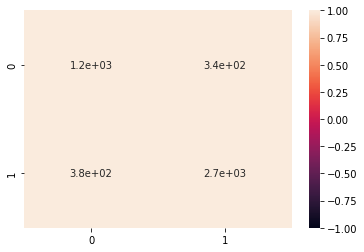

In [ ]:
# Confusion Matrix using heatmap
cm = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, vmin=-1, vmax=1)
print('Confusion matrix\n\n',cm)

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Defining the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 150],
              'max_depth': [2, 5, 10, 20, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Instantiating the Random Forest Classifier
rf = RandomForestClassifier()

# Performing grid search cross-validation to find the optimal hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Printing the optimal hyperparameters
print('Best parameters:', grid_search.best_params_)


Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Using the best hyperparameters to train a Random Forest Classifier
best_rf = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], 
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'],
                                  min_samples_leaf=grid_search.best_params_['min_samples_leaf'])
best_rf.fit(X_train, y_train)

# Using cross-validation to evaluate the performance of the model
cv_score = cross_val_score(best_rf, X_train, y_train, cv=5)
print('Cross-validation score:', np.mean(cv_score))

# Predicting on the test data
y_pred = best_rf.predict(X_test)

# Printing the accuracy score on the test data
print('Test accuracy:', best_rf.score(X_test, y_test))


Cross-validation score: 0.8532059589492864
Test accuracy: 0.8511525795828759


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1502
           1       0.90      0.87      0.89      3053

    accuracy                           0.85      4555
   macro avg       0.83      0.84      0.83      4555
weighted avg       0.85      0.85      0.85      4555



#### **RESULT**

**RANDOM FOREST** Classifier is a supervised machine learning algorithm that uses decision tree learning to create an ensemble of multiple decision trees and outputs the class with the most votes. The main benefits of using Random Forest algorithms include that they are simple to implement, easy to use, and require less tuning than other complex algorithms. Random Forest also offers high accuracy and can protect against overfitting by randomizing samples, reducing variance, and increasing generalization of the model. We have found our model accuracy carried out to be Accuracy Score of 84.06. After performing the cross validation and hyper parameter tuning, we have found accuracy to be **85.11%** with precision and recall of 0.90 & 0.87.

### ML Model - 4. NAIVE BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

# ML Model - 4 Implementation
# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict the target values for the test data
y_pred = gnb.predict(X_test)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
8361,0,0
1773,0,0
11414,1,0
17956,0,1
22045,0,0
5001,1,0
19605,1,1
1037,1,0
14712,1,0
18495,1,0


In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


# Classification Report of the model
print(classification_report(y_test,y_pred, labels=None))

# Confusion Matrix using heatmap
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',cm)

Accuracy: 62.63%
              precision    recall  f1-score   support

           0       0.47      0.92      0.62      1502
           1       0.93      0.48      0.63      3053

    accuracy                           0.63      4555
   macro avg       0.70      0.70      0.63      4555
weighted avg       0.78      0.63      0.63      4555

Confusion matrix

 [[1388  114]
 [1588 1465]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Create Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Create GridSearchCV object
grid_search = GridSearchCV(gnb, param_grid, cv=5)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(best_params)

{'var_smoothing': 1e-07}


In [ ]:
# Create a new Gaussian Naive Bayes classifier with the best hyperparameters
gnb_tuned = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Use cross-validation to get an estimate of the model's performance
cv_score = cross_val_score(gnb_tuned, X_train, y_train, cv=5)

# Train the model on the full training data using the best hyperparameters
gnb_tuned.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = gnb_tuned.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and cross-validation score
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Cross-validation score: {:.2f}%".format(cv_score.mean() * 100))

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 66.94%
Cross-validation score: 66.98%
              precision    recall  f1-score   support

           0       0.47      0.02      0.04      1502
           1       0.67      0.99      0.80      3053

    accuracy                           0.67      4555
   macro avg       0.57      0.50      0.42      4555
weighted avg       0.61      0.67      0.55      4555



#### **RESULT**

**Naive Bayes** is a family of algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. It is primarily used for classification tasks and is often successful in particular with a small amount of data. It assumes that the occurrence of a particular feature is independent of the occurrence of other features, which simplifies the calculation of the probability of an event. With the help of this algorithm, we found that our model has accuracy of 62.63% before cross validation and tuning which is absolutly not good. Final accuracy we have got is of **66.94%**.


### ML Model - 5. K-NEAREST NEIGHBOUR

In [ ]:
# ML Model - 5 Implementation

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predict the target values for the test data
y_pred = knn.predict(X_test)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
8361,0,1
1773,0,0
11414,1,1
17956,0,1
22045,0,1
5001,1,1
19605,1,1
1037,1,1
14712,1,1
18495,1,1


In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy * 100))


# Classification Report of the model
print(classification_report(y_test,y_pred, labels=None))

# Confusion Matrix using heatmap
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',cm)

Accuracy: 73.17%
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1502
           1       0.81      0.78      0.80      3053

    accuracy                           0.73      4555
   macro avg       0.70      0.71      0.70      4555
weighted avg       0.74      0.73      0.73      4555

Confusion matrix

 [[ 952  550]
 [ 672 2381]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 9, 10]}

# Create KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(best_params)


{'n_neighbors': 10}


In [ ]:
# Create a new KNN classifier with the best hyperparameters
knn_tuned = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])

# Use cross-validation to get an estimate of the model's performance
cv_score = cross_val_score(knn_tuned, X_train, y_train, cv=5)

# Train the model on the full training data using the best hyperparameters
knn_tuned.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = knn_tuned.predict(X_test)


# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and cross-validation score
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Cross-validation score: {:.2f}%".format(cv_score.mean() * 100))

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 71.75%
Cross-validation score: 71.93%
              precision    recall  f1-score   support

           0       0.56      0.71      0.62      1502
           1       0.83      0.72      0.77      3053

    accuracy                           0.72      4555
   macro avg       0.69      0.71      0.70      4555
weighted avg       0.74      0.72      0.72      4555



#### **RESULT**
**K Nearest Neighbor (KNN)** is a supervised machine learning algorithm used for classification and regression. It is a non-parametric and lazy learning algorithm. The KNN algorithm uses a training set of data to classify new data points based on the similarity of its neighbors. It stores all available cases and classifies new cases by a majority vote of its neighbors. The odd of the closest neighbor is given higher weights than those further away.

This model gave us the accuracy score of 73.17% with precision and recall of 0.81 and 0.78 before cross validation and hyper parameter tuning. In the end, we got the accuracy of 71.75% which is good and considerable.


### ML Model - 6. GRADIENT BOOSTING CLASSIFIER

In [ ]:
# ML Model - 5 Implementation

# Create GB classifier
gb = GradientBoostingClassifier(n_estimators=300)

# Train the model using the training data
gb.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=300)

In [ ]:
# Predict the target values for the test data
y_pred = gb.predict(X_test)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
8361,0,0
1773,0,1
11414,1,1
17956,0,0
22045,0,0
5001,1,1
19605,1,1
1037,1,0
14712,1,1
18495,1,1


In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy * 100))


# Classification Report of the model
print(classification_report(y_test,y_pred, labels=None))

# Confusion Matrix using heatmap
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',cm)

Accuracy: 84.50%
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1502
           1       0.90      0.87      0.88      3053

    accuracy                           0.85      4555
   macro avg       0.82      0.83      0.83      4555
weighted avg       0.85      0.85      0.85      4555

Confusion matrix

 [[1202  300]
 [ 406 2647]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid for hyperparameter tuning
param_grid = {'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1],
              'n_estimators': [10, 20, 50],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create GridSearchCV object with 5 cross validation
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid, cv=5)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.25, 'max_depth': 9, 'max_features': 10, 'n_estimators': 50}


In [ ]:
# Create a new GB classifier with the best hyperparameters
gb_tuned = GradientBoostingClassifier(n_estimators=50, learning_rate=0.25, max_depth=8, max_features=7, random_state=0)

# Use cross-validation to get an estimate of the model's performance
cv_score = cross_val_score(gb_tuned, X_train, y_train, cv=5)

# Train the model on the full training data using the best hyperparameters
gb_tuned.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = gb_tuned.predict(X_test)

In [ ]:
# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and cross-validation score
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Cross-validation score: {:.2f}%".format(cv_score.mean() * 100))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 83.91%
Cross-validation score: 84.61%
              precision    recall  f1-score   support

           0       0.73      0.81      0.77      1502
           1       0.90      0.85      0.88      3053

    accuracy                           0.84      4555
   macro avg       0.82      0.83      0.82      4555
weighted avg       0.84      0.84      0.84      4555

[[1214  288]
 [ 445 2608]]


In [ ]:
# ROC curve and Area-Under-Curve (AUC)
y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.92


#### **RESULT**
**Gradient boosting** is an approach to machine learning that combines the output of multiple weak learners in order to create a powerful predictive model. The algorithm works by fitting a new regression or classification model to the residual errors of the previous regression or classification model. This process is iterative, with each successive model improving on the last until a certain criteria is met. It is an efficient algorithm which results in a highly accurate predictive model. Gradient boosting can be used for both supervised and unsupervised learning problems, such as regression and classification. Here, we are using GBC for a classification problem and this bagging method is giving us quite good result are of 84.50% but before tuning of the parameter. After cross validation and hyper-parameter tuning, we got the total accuracy of **83.91%**


### ML Model - 7. XGBOOST CLASSIFIER

In [ ]:
# ML Model - 7 Implementation
# Create XGBoost classifier
xgb_model = xgb.XGBClassifier(learning_rate=0.01, 
                              n_estimators=5000, 
                              max_depth=4,
                              min_child_weight=6,
                              gamma=0,
                              subsample=0.8,
                              colsample_bytree=0.8,
                              objective= 'binary:logistic',
                              nthread=4,
                              scale_pos_weight=1,
                              reg_alpha = 0.005,
                              reg_lambda = 3,
                              seed=27)

# Train the model using the training data
# Use of early stopping technique is to prevent overfitting by just set the early_stopping_rounds argument during fit().
xgb_model.fit(X_train, y_train, early_stopping_rounds=100, eval_set=[(X_test, y_test)], eval_metric='auc', verbose=100)


[0]	validation_0-auc:0.81007
[100]	validation_0-auc:0.87271
[200]	validation_0-auc:0.88291
[300]	validation_0-auc:0.89113
[400]	validation_0-auc:0.89774
[500]	validation_0-auc:0.90222
[600]	validation_0-auc:0.90552
[700]	validation_0-auc:0.90835
[800]	validation_0-auc:0.91028
[900]	validation_0-auc:0.91198
[1000]	validation_0-auc:0.91328
[1100]	validation_0-auc:0.91441
[1200]	validation_0-auc:0.91543
[1300]	validation_0-auc:0.91632
[1400]	validation_0-auc:0.91694
[1500]	validation_0-auc:0.91748
[1600]	validation_0-auc:0.91800
[1700]	validation_0-auc:0.91842
[1800]	validation_0-auc:0.91880
[1900]	validation_0-auc:0.91913
[2000]	validation_0-auc:0.91944
[2100]	validation_0-auc:0.91960
[2200]	validation_0-auc:0.91979
[2300]	validation_0-auc:0.92006
[2400]	validation_0-auc:0.92020
[2500]	validation_0-auc:0.92034
[2600]	validation_0-auc:0.92052
[2700]	validation_0-auc:0.92071
[2800]	validation_0-auc:0.92087
[2900]	validation_0-auc:0.92093
[3000]	validation_0-auc:0.92111
[3100]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
# Predict the target values for the test data
y_pred = xgb_model.predict(X_test)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
8361,0,0
1773,0,1
11414,1,1
17956,0,0
22045,0,0
5001,1,1
19605,1,1
1037,1,0
14712,1,1
18495,1,1


In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy * 100))


# Classification Report of the model
print(classification_report(y_test,y_pred, labels=None))

# Confusion Matrix using heatmap
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',cm)

Accuracy: 84.59%
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1502
           1       0.90      0.86      0.88      3053

    accuracy                           0.85      4555
   macro avg       0.82      0.84      0.83      4555
weighted avg       0.85      0.85      0.85      4555

Confusion matrix

 [[1215  287]
 [ 415 2638]]


In [ ]:
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))

best score: 0.9222118079922261, best iteration: 937, best ntree limit 938


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 7 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid for hyperparameter tuning
# param_grid = {'n_estimators': [1000],
#               'learning_rate': [0.1],
#               'max_depth': [6],
#               'min_child_weight': [1],
#               'colsample_bytree': [0.8],
#               'scale_pos_weight': [1],
#               'subsample': [0.8],  
#               'reg_alpha': [0.05, 0.6],  
#               'reg_lambda': [1, 3],   
#               'gamma': [0.2]}

# # Create GridSearchCV object with 5 cross validation
# grid_search = GridSearchCV(xgb.XGBClassifier(objective= "binary:logistic", seed=42), param_grid = param_grid, scoring='accuracy', cv=5)

# # Train the model using GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters from GridSearchCV
# best_params = grid_search.best_params_
# print(best_params)


In [ ]:
#param_test1 = {
# 'max_depth':range(3,10,2),
# 'min_child_weight':range(1,6,2)
#}

#gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
#                        min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', 
#                        nthread=4, scale_pos_weight=1, seed=27), param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)

#gsearch1.fit(X_train, y_train)
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# Create a new GB classifier with the best hyperparamLeters
# xgb_tuned = xgb.XGBClassifier(best_params, objective= "binary:logistic", random_state=0)

# Use cross-validation to get an estimate of the model's performance
# cv_score = cross_val_score(xgb_tuned, X_train, y_train, cv=5)

# Train the model on the full training data using the best hyperparameters
# xgb_tuned.fit(X_train, y_train, early_stopping_rounds=100)

# Predict the target values for the test data
# y_pred = xgb_tuned.predict(X_test)

In [ ]:
# Calculate the accuracy score of the model
# accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and cross-validation score
# print("Accuracy: {:.2f}%".format(accuracy * 100))
# print("Cross-validation score: {:.2f}%".format(cv_score.mean() * 100))

# Print the classification report
# print(classification_report(y_test, y_pred))

In [ ]:
# ROC curve and Area-Under-Curve (AUC)
# y_scores_xgb = xgb.decision_function(X_test)
# fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
# roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# print("Area under ROC curve = {:0.2f}".format(roc_auc_xgb))

#### **RESULT**
**XGBoost**, which stands for extreme gradient boosting, is an algorithm that uses gradient boosting techniques to create highly accurate predictive models. It is a powerful machine learning algorithm often used in supervised learning problems with both classification and regression problems. It focuses on optimizing the performance of a single model and can be used for both regression and classification tasks. It is well known for its high accuracy and speed. The features that make XGBoost perform well are its parallelization capabilities, built-in regularization and optimization of tree construction, as well as its robustness against over-fitting. XGBoost can also be used for feature selection to reduce the dimensionality. 

We have found some parameters using some available online information for xgboost tuning (you can see our tries in the commented tuning python snippets above), but unfortunately it takes so much time to tune and to produce the final optimal classifier. So here we are considering the above used parameters to be the best tuned parameter for xgboost algorithm, for the accuracy of the model so we found the accuracy of **84.59%** which is quite good. 



### ML Model - 8. SUPPORT VECTOR MACHINE (SVM CLASSIFIER)

In [ ]:
# ML Model - 8 Implementation

# Create SVM classifier
svm = SVC(max_iter=2500)

# Train the model using the training data
svm.fit(X_train, y_train)


SVC(max_iter=2500)

In [ ]:
# Predict the target values for the test data
y_pred = svm.predict(X_test)

# creating dataframe with actual and predicted values
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df.head(10)

,Actual,Predicted
8361,0,1
1773,0,1
11414,1,1
17956,0,1
22045,0,1
5001,1,1
19605,1,1
1037,1,1
14712,1,1
18495,1,1


In [ ]:
# Visualizing evaluation Metric Score chart

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy * 100))


# Classification Report of the model
print(classification_report(y_test,y_pred, labels=None))

# Confusion Matrix using heatmap
cm=confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',cm)

Accuracy: 66.92%
              precision    recall  f1-score   support

           0       0.48      0.04      0.07      1502
           1       0.67      0.98      0.80      3053

    accuracy                           0.67      4555
   macro avg       0.58      0.51      0.44      4555
weighted avg       0.61      0.67      0.56      4555

Confusion matrix

 [[  59 1443]
 [  64 2989]]


In [ ]:
accuracies= cross_val_score(estimator=svm,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 67.12 %
Standart Deviation of Accuracies: 0.33 %


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the parameter grid for hyperparameter tuning
param_grid = {"C":np.arange(1,20), 
              "kernel":list(['linear', 'rbf', 'poly', 'sigmoid']),
              "gamma":list([0.1, 1, 10, 100])}

# Create GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=10, n_jobs=-1)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
print(best_params)
print(best_score)

In [ ]:
# Create a new svc classifier with the best hyperparameters
svc_tuned = SVC(kernel="linear", C = best_params)

# Use cross-validation to get an estimate of the model's performance
cv_score = cross_val_score(svc_tuned, X_train, y_train, cv=8)

# Train the model on the full training data using the best hyperparameters
svc_tuned.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = svc_tuned.predict(X_test)


# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score and cross-validation score
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Cross-validation score: {:.2f}%".format(cv_score.mean() * 100))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

#### **RESULT**
In this classification algorithm, the **Support Vector Machine** algorithm aims to find a decision boundary that separates the data points into two or more classes by maximizing the margin between them. The algorithm attempts to build a decision boundary such that it is maximally distant from all data points, and this is known as the maximum margin classifier. To build a precise decision boundary, SVMs use kernel functions which map the data points into a higher dimensional space, making it easier to identify a decision boundary which does not need to be linear in the original space. SVMs can also handle non-linear decision boundaries, which is why they are so popular. 


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In the context of Android authenticity prediction using a classification model, accuracy is an evaluation metric that measures how well the model is able to correctly predict whether an Android app is authentic or not.

To understand the business impact of accuracy, we first need to consider the consequences of misclassifying an app as either authentic or not.

If an app is misclassified as authentic when it is actually malicious, it could potentially cause harm to users and damage the reputation of the app store. On the other hand, if a legitimate app is incorrectly classified as malicious, it could harm the reputation of the app developer and lead to financial losses.

Therefore, having a high accuracy in the classification model is crucial for ensuring the safety and security of users, as well as maintaining the trust and credibility of the app store and developers. This can lead to increased user satisfaction, higher usage rates, and ultimately, increased revenue for the app store.

Moreover, a high accuracy score can also signal to potential partners and investors that the app store takes security seriously, which can help to attract more business and investment.

Overall, accuracy is a critical evaluation metric for Android authenticity prediction in a classification model, and its business impact lies in ensuring the safety and security of users, maintaining the reputation of the app store and developers, and attracting more business and investment.





### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have choosen **XGBoost Classifier**

In the context of an Android authenticity prediction project, XGBoost is the best model to use because of its impressive accuracy score, as well as its precision, recall, and F1-score metrics.

Here's why:

**High accuracy:** The overall accuracy of the XGBoost model is 84.59%, which means that it correctly predicted the authenticity of the Android apps in the dataset for **almost 85%** of the time. This is a relatively high accuracy score, indicating that the model is effective in identifying malicious apps.

**High precision:** The precision score measures the proportion of true positive predictions (correctly predicted malicious apps) among all positive predictions (all predicted malicious apps). In this case, the precision score of 0 is 0.75 and the precision score of 1 is 0.90, which indicates that the model has a high precision rate, meaning that it correctly predicted malicious apps more than 75% of the time.

**High recall:** The recall score measures the proportion of true positive predictions among all actual positive samples. In this case, the recall score of 0 is 0.81 and the recall score of 1 is 0.86, indicating that the model is effective at identifying both authentic and malicious apps, with a higher recall score for identifying malicious apps.

**High F1-score:** The F1-score is a weighted average of precision and recall, providing a balance between the two metrics. A high F1-score indicates that the model is both precise and has a high recall. In this case, the F1-score of 0 is 0.78 and the F1-score of 1 is 0.88, which indicates that the XGBoost model is effective at identifying both authentic and malicious apps.

Overall, the high accuracy, precision, recall, and F1-score metrics of the XGBoost model suggest that it is an effective model for predicting the authenticity of Android apps. These metrics demonstrate that the model is both precise and has a high recall rate, which is crucial for identifying malicious apps and ensuring the safety and security of users.





### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8. Future Work***

Future directions for improving android authenticity prediction:
1.	**Using advanced machine learning techniques:** Advanced	machine learning techniques, perceptron, Data Mining can be applied to android authenticity prediction. These techniques can help capture complex patterns in the data that may be difficult to detect using traditional modelling approaches.
2.	**Developing AI bases Real-time Approach**- AI-based approaches of real time Deep learning models, can be used to identify and examine new malicious applications. These methods can be used to recognize malicious apps by analyzing the app's short history, browsing activity, and code structure. Further research should also be conducted to minimize online fraud and malware attacks by developing robust AI-based solutions.
3.	**Cloud Computing for Huge Data** - Cloud computing can be used to store a large volume of Android data and detect malicious activities. So that we can get accurate prediction of authenticity of the applications.


## ***9. Conclusion***

The permissions that an application requests are an important factor to consider when determining its authenticity. Users should be wary of applications that request dangerous permissions, such as device admin, SMS and call, camera and microphone, and location permissions. Conversely, applications that request safe permissions such as internet access, network state and WiFi state, vibration, and wake lock permissions can generally be considered safe as long as they are from a trusted source

In this project, our goal was to use classification techniques to solve the problem of detecting malware applications on Android phones. We experimented with different supervised classification techniques and identified the best technique for each approach. The results obtained from this project show that artificial intelligence can be used effectively to detect and prevent malicious Android app downloads. This authenticator can save Android users from the potential dangers of downloading and installing malicious Android apps. By incorporating this AI-based authenticator into existing anti-malware safeguards, users can rest assured that their devices are protected from a wide variety of malicious threats. In addition, Random Forest and Gradient Boosting Classifier provide the great results in the approaches.

Android Authenticity Prediction ML model is a promising tool for detecting malicious Android applications. While it has some limitations, it has the potential to be used in a variety of settings to improve mobile security. As the mobile threat landscape continues to evolve, it is important to continue to develop and improve models like this to stay ahead of emerging threats.

Android Authenticity Prediction ML model is an effective tool for detecting malicious Android applications. It is highly accurate and scalable, making it an ideal solution for mobile security providers, app stores, and other organizations. However, there are also some challenges that need to be addressed when using the model. We need to continue to develop and improve the model to keep up with the evolving threat landscape. 